In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from load_data import *
from util import *

%matplotlib inline

In [2]:
path = '/media/clo302/3TB_RAID/data/tcga_embedding/'
ref_path = '/media/clo302/3TB_RAID/ref/TCGA_RNASeq/'

load data

In [3]:
fl1 = ['gemb_CN.csv', 'semb_CN.csv', 'semb_normal.csv']
fl2 = ['gemb_normal.csv', 'gemb_bias_CN.csv', 'gemb_bias_normal.csv', 'semb_bias_CN.csv', 'semb_bias_normal.csv']
fl3 = ['som_rand_swgts.csv', 'som_pca_swgts.csv', 'som_rand_gwgts.csv', 'som_pca_gwgts.csv']

In [4]:
gemb_CN, genes, semb_CN, sids_CN, semb_normal, sids_normal = load_data(path,  fl1, return_rn=True)
gemb_normal, gemb_bias_CN, gemb_bias_normal, semb_bias_CN, semb_bias_normal = load_data(path, fl2)
som_rand_swgt, som_pca_swgt, som_rand_gwgt, som_pca_gwgt = load_data(path, fl3)

(20531, 50)
(9544, 50)
(701, 50)
(20531, 50)
(20531, 1)
(20531, 1)
(9544, 1)
(701, 1)
(9544, 50)
(9544, 50)
(20531, 50)
(20531, 50)


In [5]:
gene2idx = {g:i for i, g in enumerate(genes)}

In [6]:
sid2ca, ca_cats = load_sid2ca(ref_path)

len: 10245


In [7]:
rawlog2 = load_raw(ref_path)

raw log2exp PCA

In [8]:
pca = PCA(n_components=50)
raw_samp_pca = pca.fit(rawlog2.T).components_
raw_gene_pca = pca.fit(rawlog2).components_
print(raw_samp_pca.T.shape)
print(raw_gene_pca.T.shape)

(9544, 50)
(20531, 50)


## sample PCA

In [9]:
ca2col = {c: col for c, col in zip(sorted(list(ca_cats)), sns.color_palette('hls', n_colors=len(ca_cats)))}
ca = [sid2ca[s] for s in sids_CN]

In [10]:
pca = PCA(n_components=3)

##### som pca initialized sample codebook vector PCA

In [11]:
som_pca_swgt_pca = pca.fit(som_pca_swgt.T).components_; som_pca_swgt_pca.shape

(3, 9544)

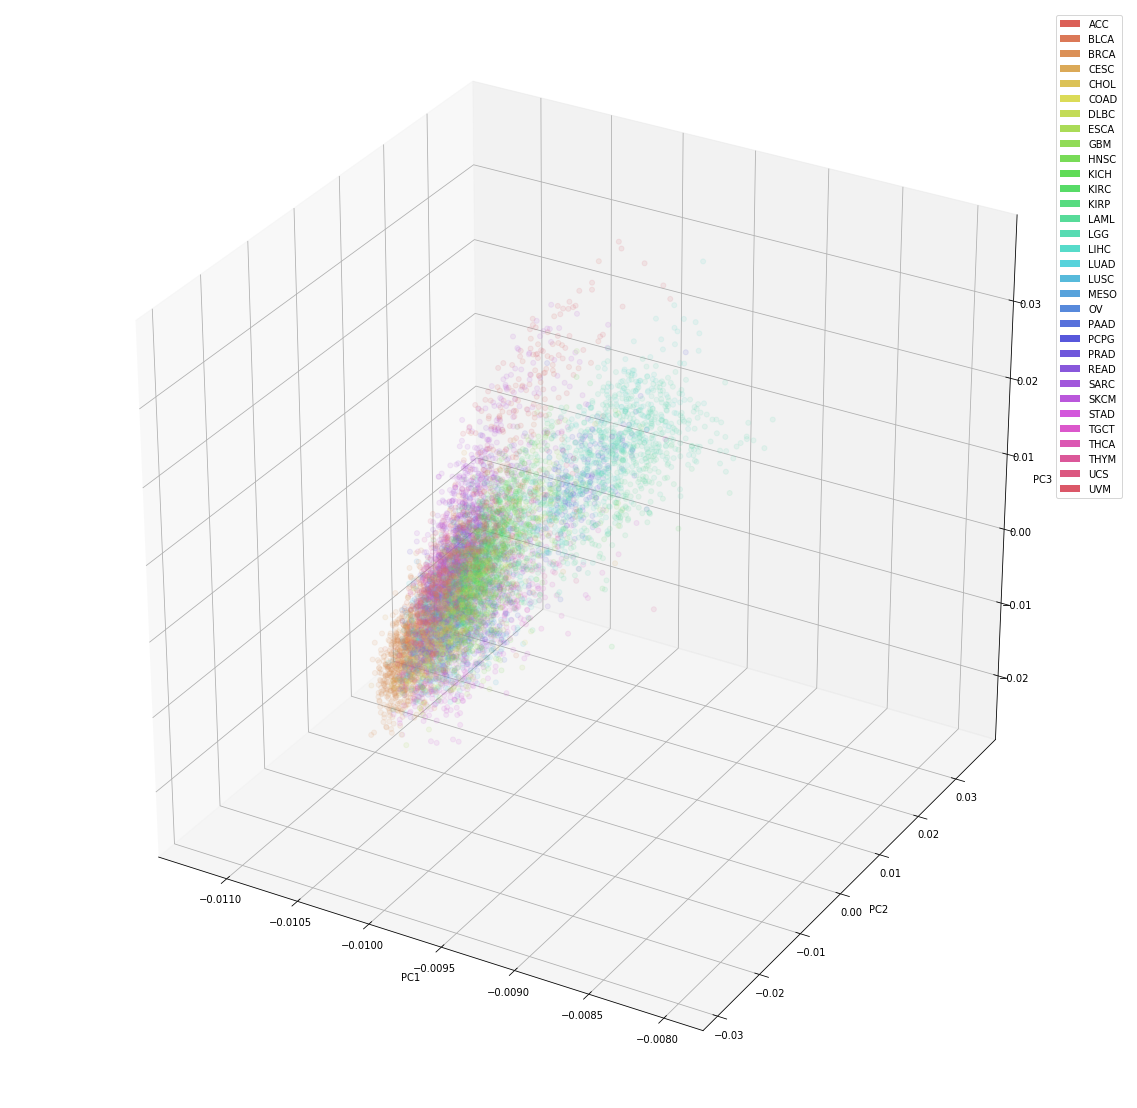

In [12]:
plot_samp_3dPCA(som_pca_swgt_pca, ca, ca2col)

##### som random initialized sample codebook vector PCA

In [13]:
som_rand_swgt_pca = pca.fit(som_rand_swgt.T).components_; som_rand_swgt_pca.shape

(3, 9544)

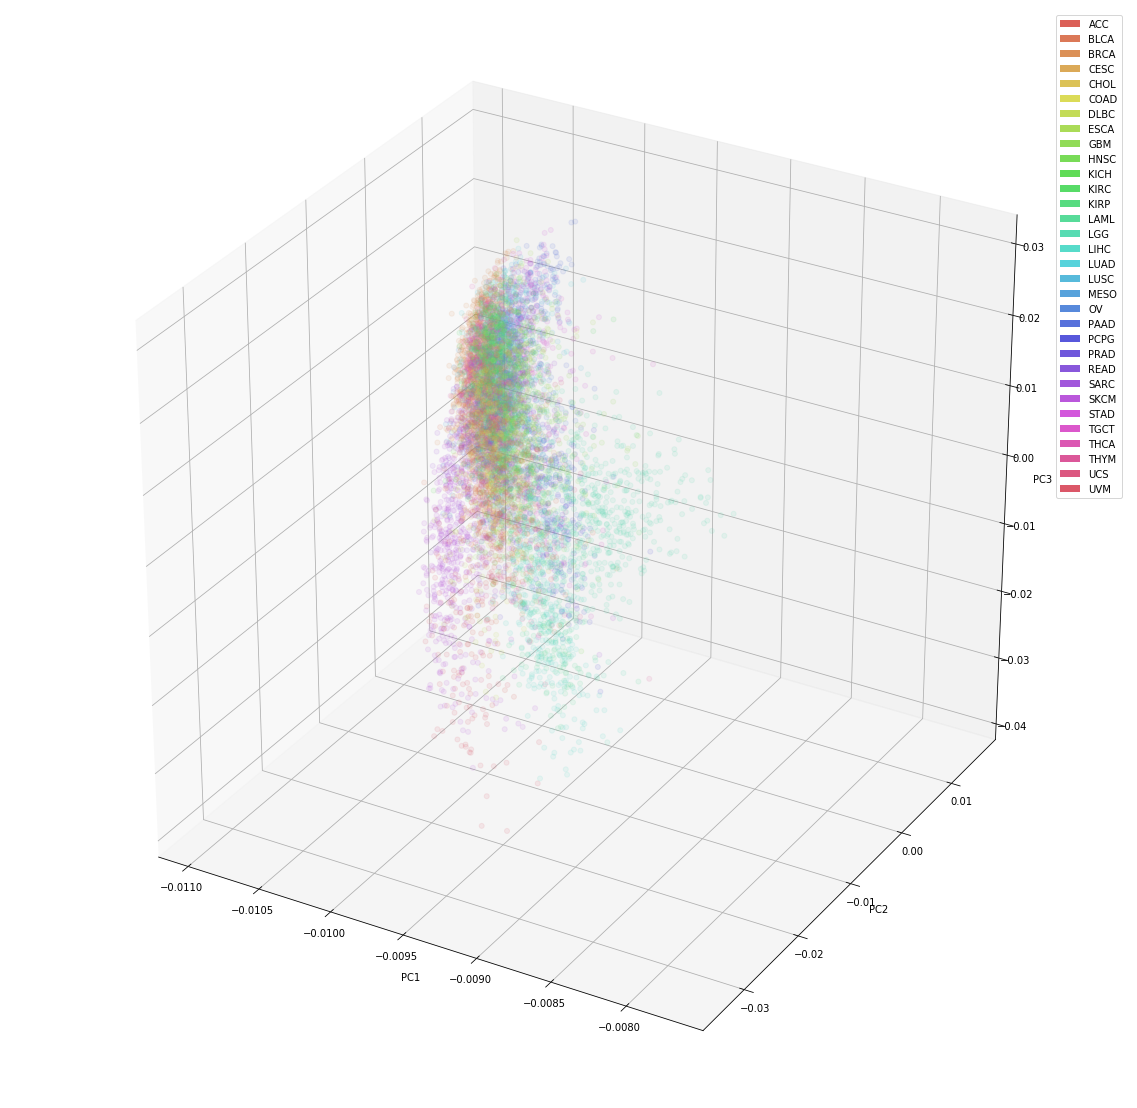

In [14]:
plot_samp_3dPCA(som_rand_swgt_pca, ca, ca2col)

##### raw log2exp

In [15]:
rawlog2_samp_pca = pca.fit(rawlog2.T).components_; rawlog2_samp_pca.shape

(3, 9544)

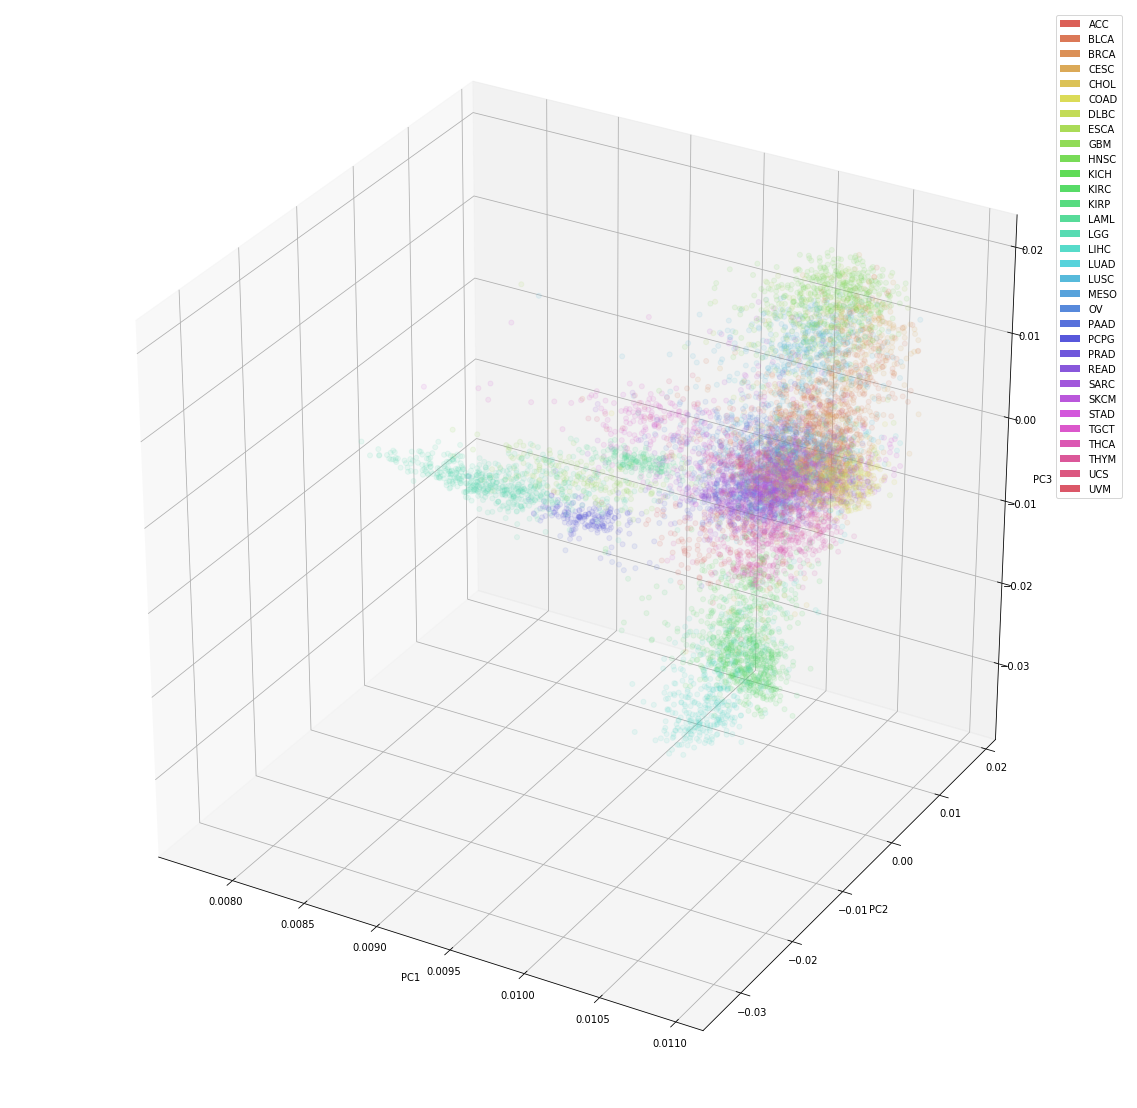

In [16]:
plot_samp_3dPCA(rawlog2_samp_pca, ca, ca2col)

##### semb CN

In [17]:
semb_pca = pca.fit(semb_CN.T).components_; semb_pca.shape

(3, 9544)

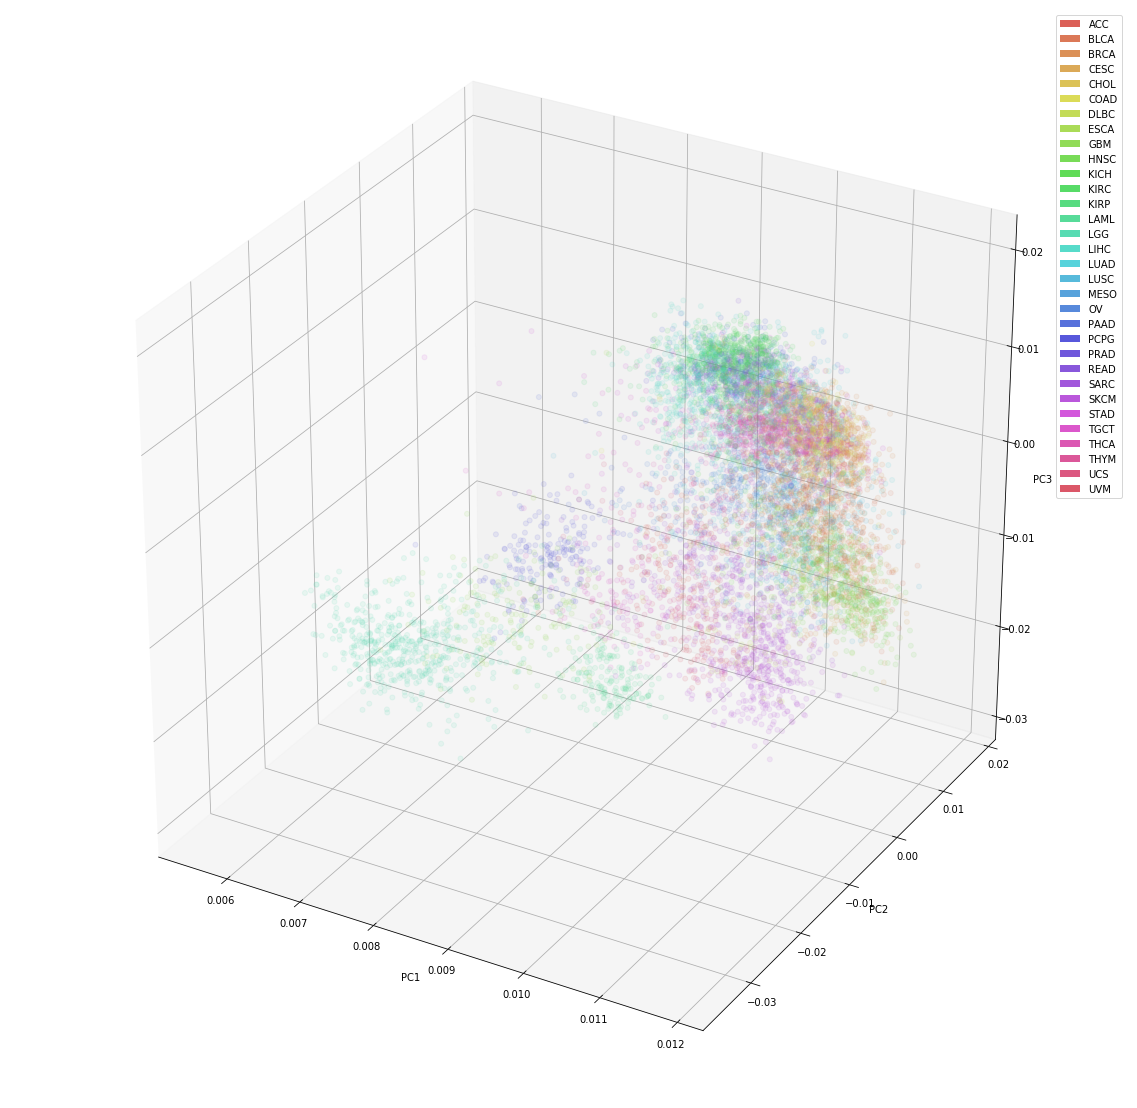

In [18]:
plot_samp_3dPCA(semb_pca, ca, ca2col)

##### raw log2exp 50-component PCA

In [19]:
raw_samp_pca_pca = pca.fit(raw_samp_pca).components_; raw_samp_pca_pca.shape

(3, 9544)

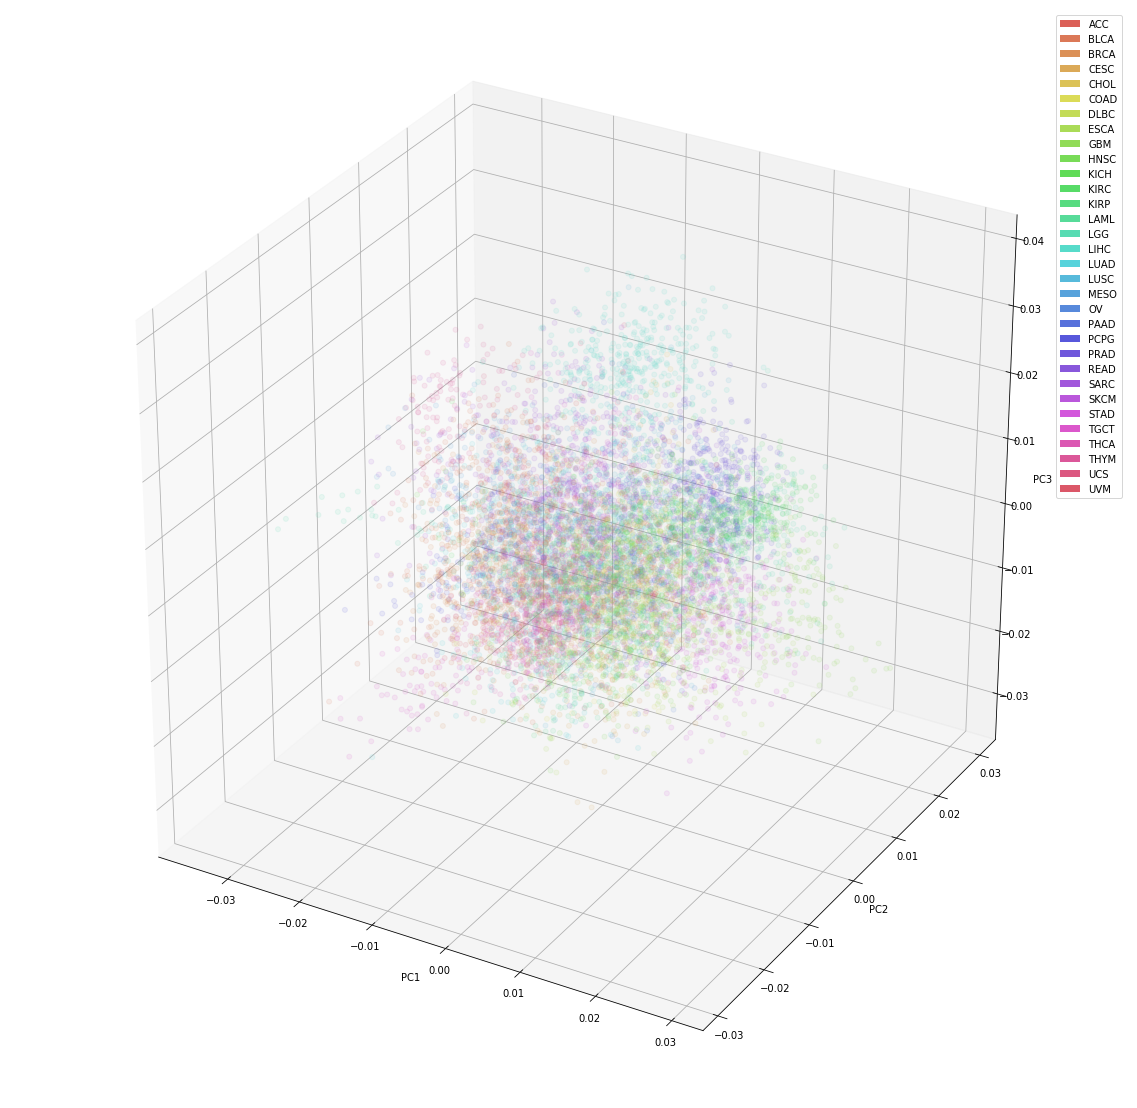

In [20]:
plot_samp_3dPCA(raw_samp_pca_pca, ca, ca2col)

#### Hepatobilliary pancreatic cancer

In [21]:
hbpabbr = ['LIHC', 'CHOL', 'PAAD']
hbp_idxs = [i for i, s in enumerate(sids_CN) if sid2ca[s] in hbpabbr]
hbp_ca = [sid2ca[s] for s in sids_CN if sid2ca[s] in hbpabbr]
hbp2col = {'LIHC':'g', 'PAAD':'b', 'CHOL':'r'}

##### hbp - semb CN

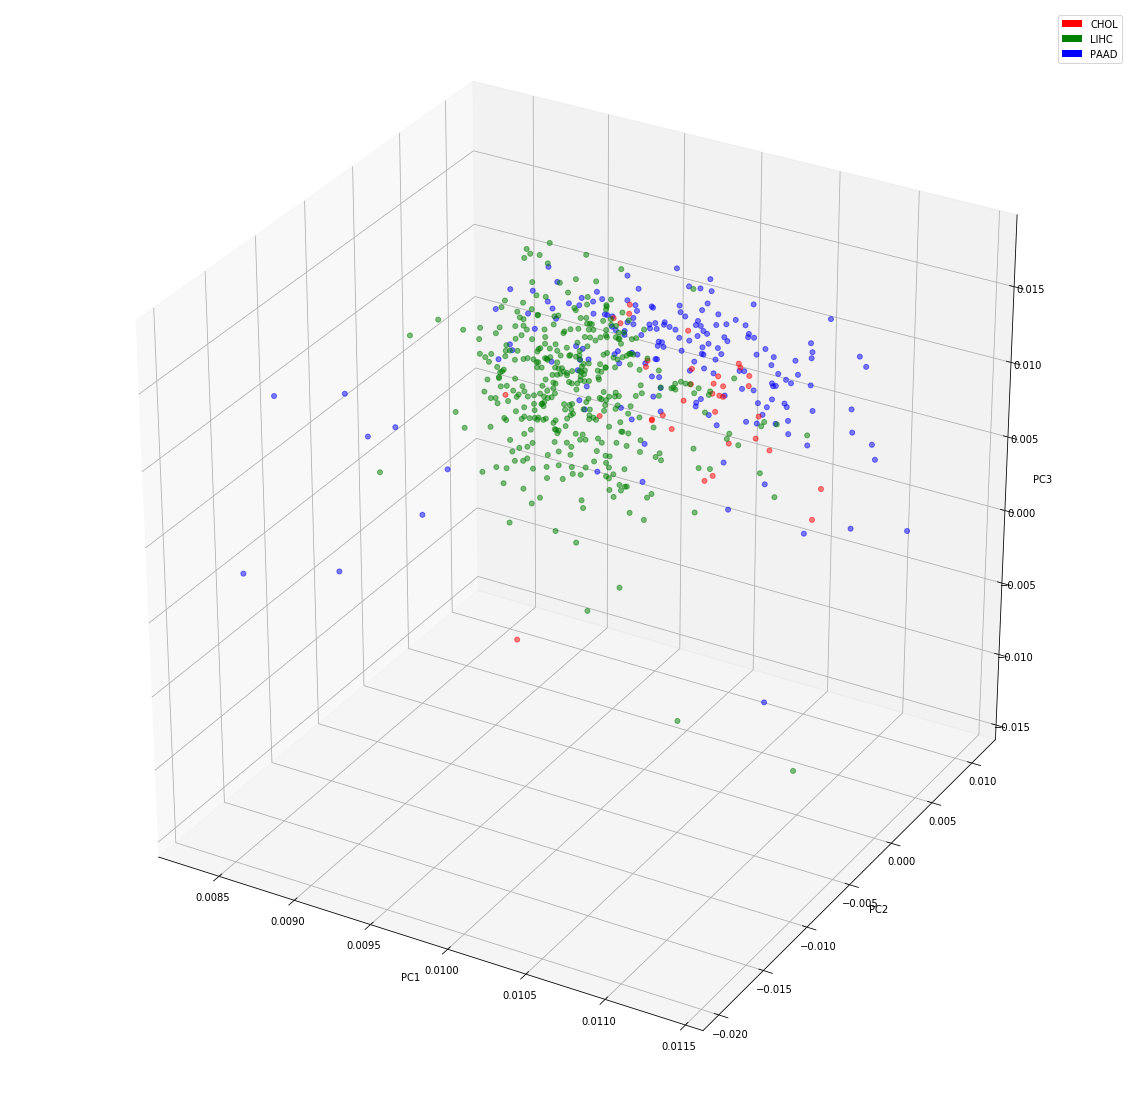

In [22]:
plot_samp_3dPCA(semb_pca, hbp_ca, hbp2col, subset_idxs=hbp_idxs, alpha=0.5)

##### hbp - raw log2exp 50-component PCA

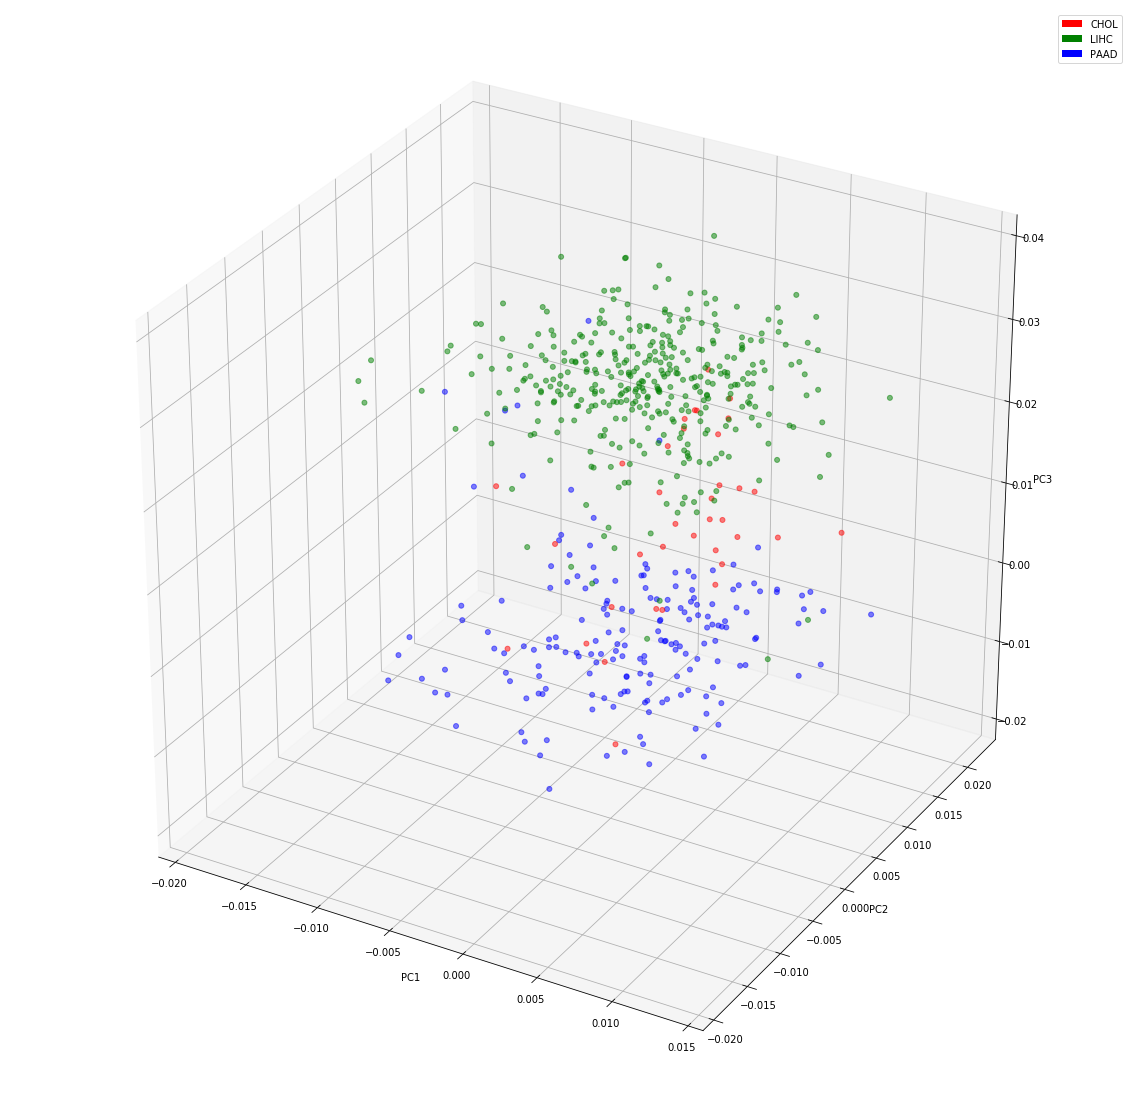

In [23]:
plot_samp_3dPCA(raw_samp_pca_pca, hbp_ca, hbp2col, subset_idxs=hbp_idxs, alpha=0.5)

##### hbp - SOM PCA initialized sample codebook vector 

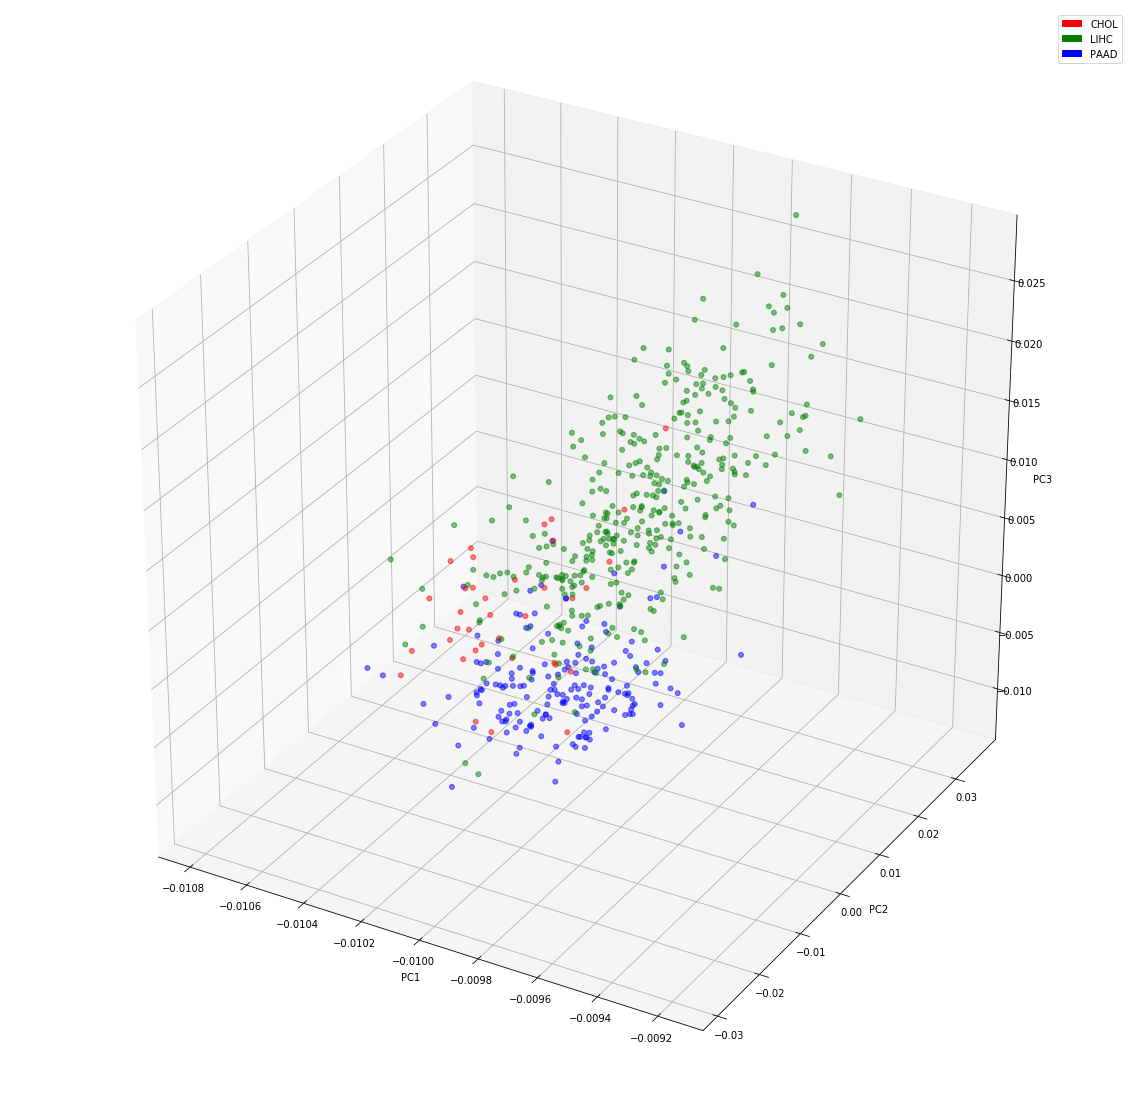

In [24]:
plot_samp_3dPCA(som_pca_swgt_pca, hbp_ca, hbp2col, subset_idxs=hbp_idxs, alpha=0.5)

##### SOM random initialized sample codebook vector

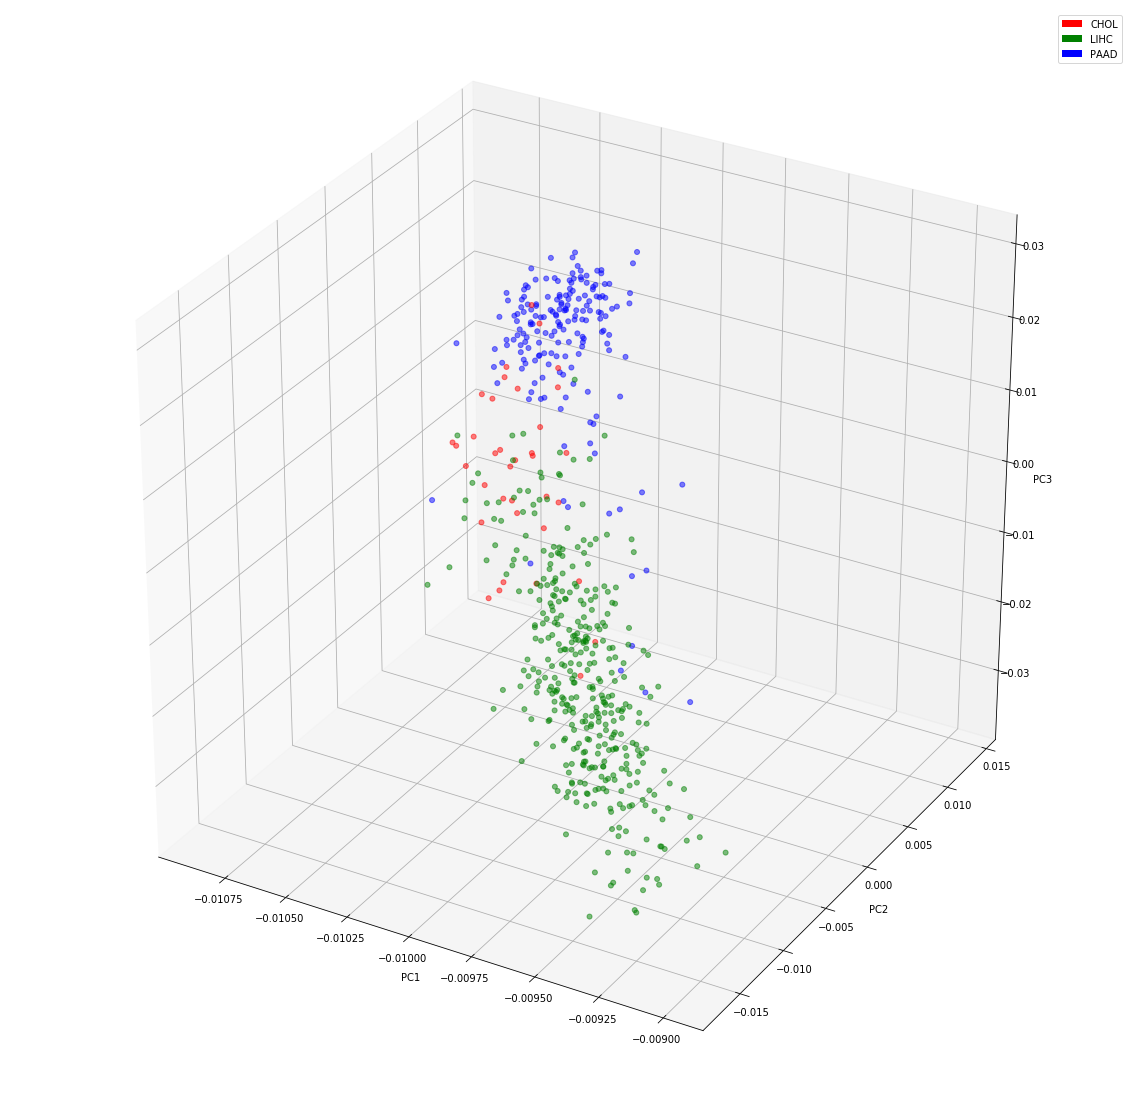

In [25]:
plot_samp_3dPCA(som_rand_swgt_pca, hbp_ca, hbp2col, subset_idxs=hbp_idxs, alpha=0.5)

## gene PCA

In [26]:
pca = PCA(n_components=3)

In [27]:
hk_genes = ['GAPDH', 'ACTB', 'B2M']
hk_idxs = [gene2idx[g] for g in hk_genes]
g1_genes = ['CCNE1', 'CCNE2', 'CDK2']
g1_idxs = [gene2idx[g] for g in g1_genes]
dd_genes = ['SIRT6', 'CHD1L', 'MRE11A']
dd_idxs = [gene2idx[g] for g in dd_genes]
hl_idxs = [hk_idxs, g1_idxs, dd_idxs]

##### raw log2exp

In [28]:
rawlog2_gene_pca = pca.fit(rawlog2).components_; rawlog2_gene_pca.shape

(3, 20531)

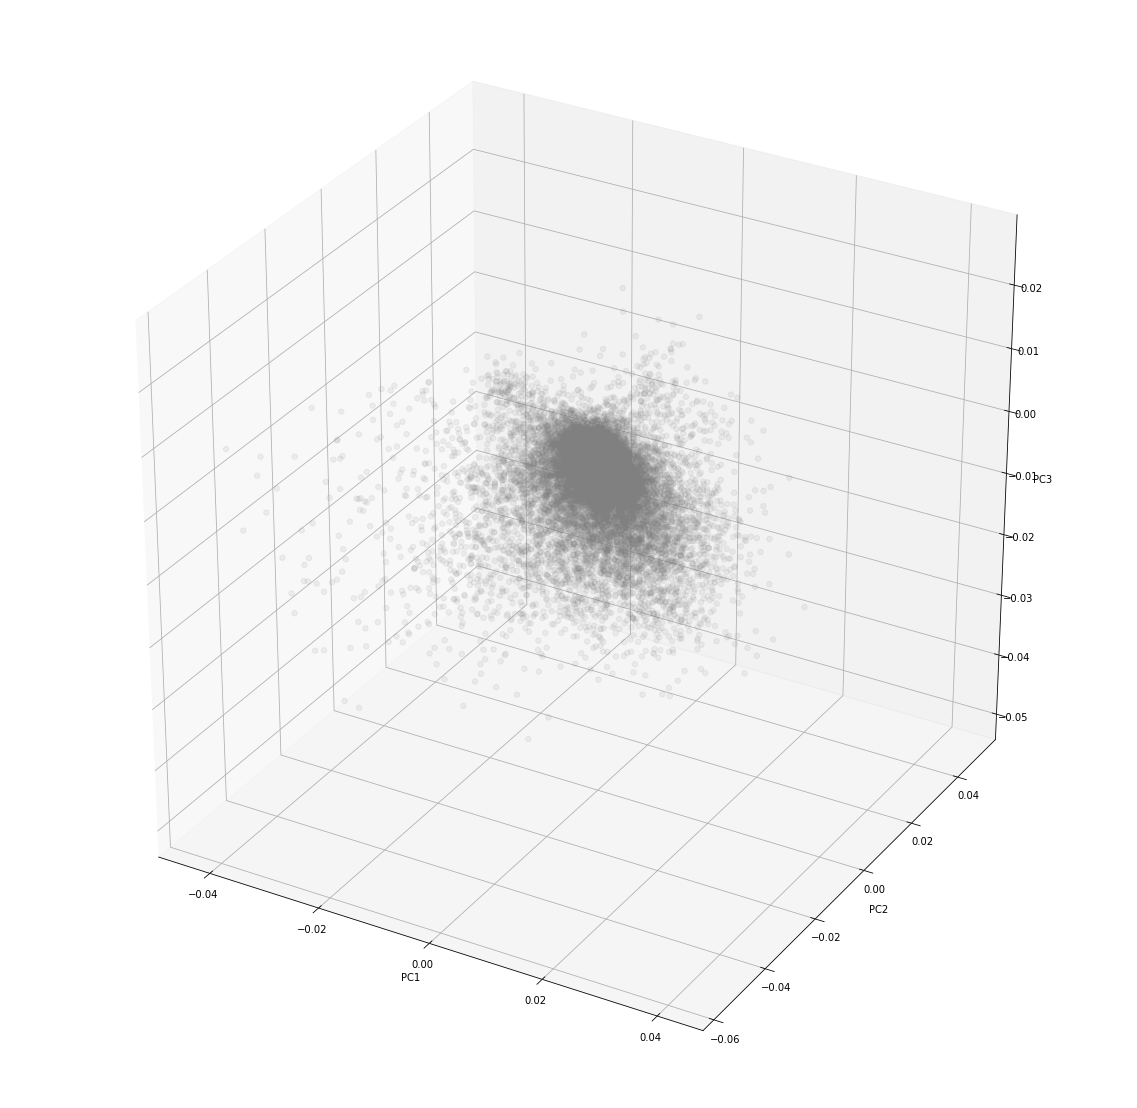

In [29]:
plot_gene_3dPCA(rawlog2_gene_pca, genes)

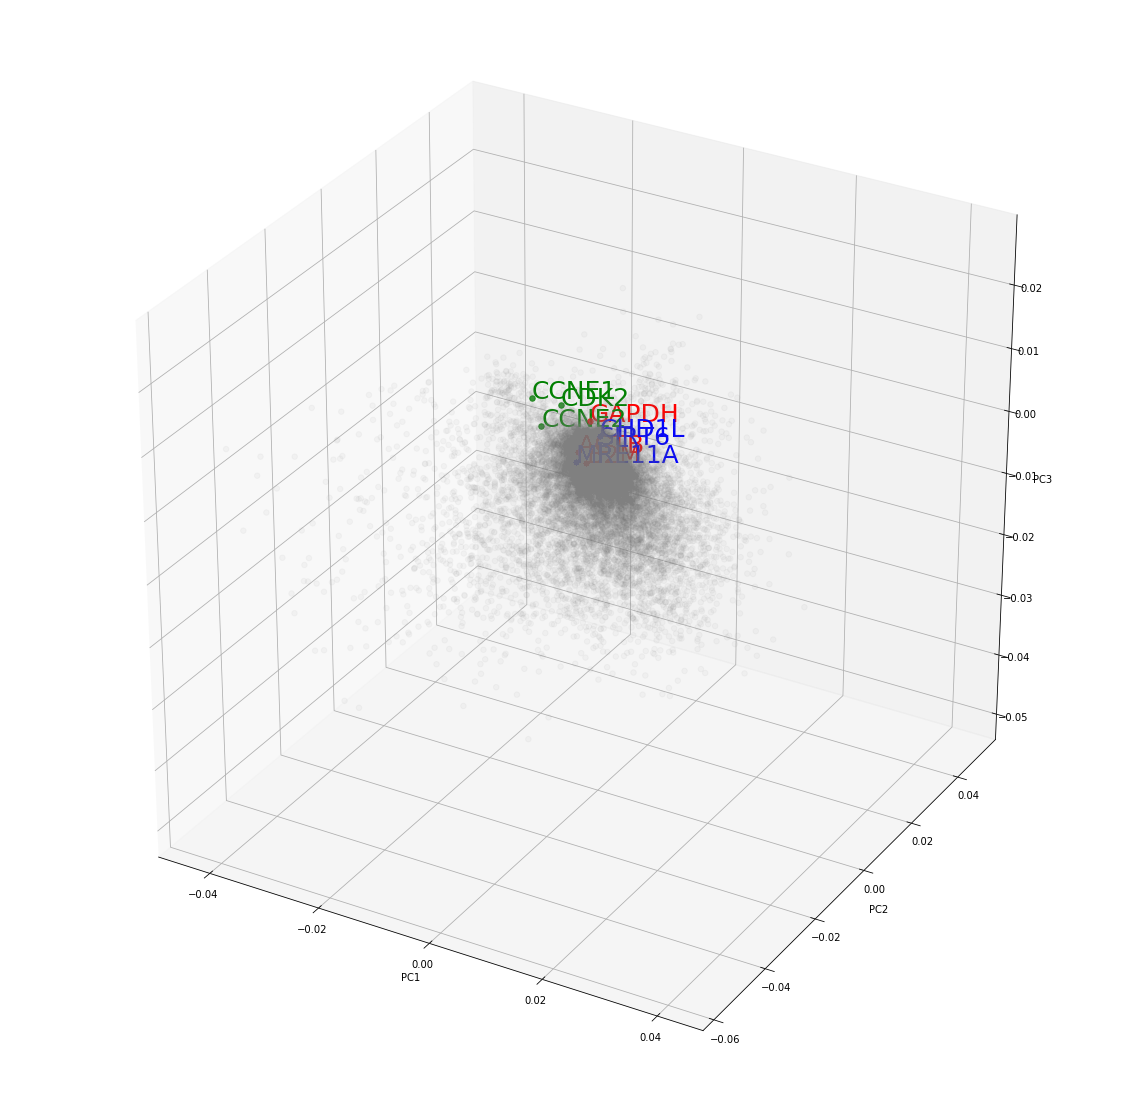

In [30]:
plot_gene_3dPCA(rawlog2_gene_pca, genes, hl_idxs=hl_idxs, bgalpha=0.05, hlfs=25)

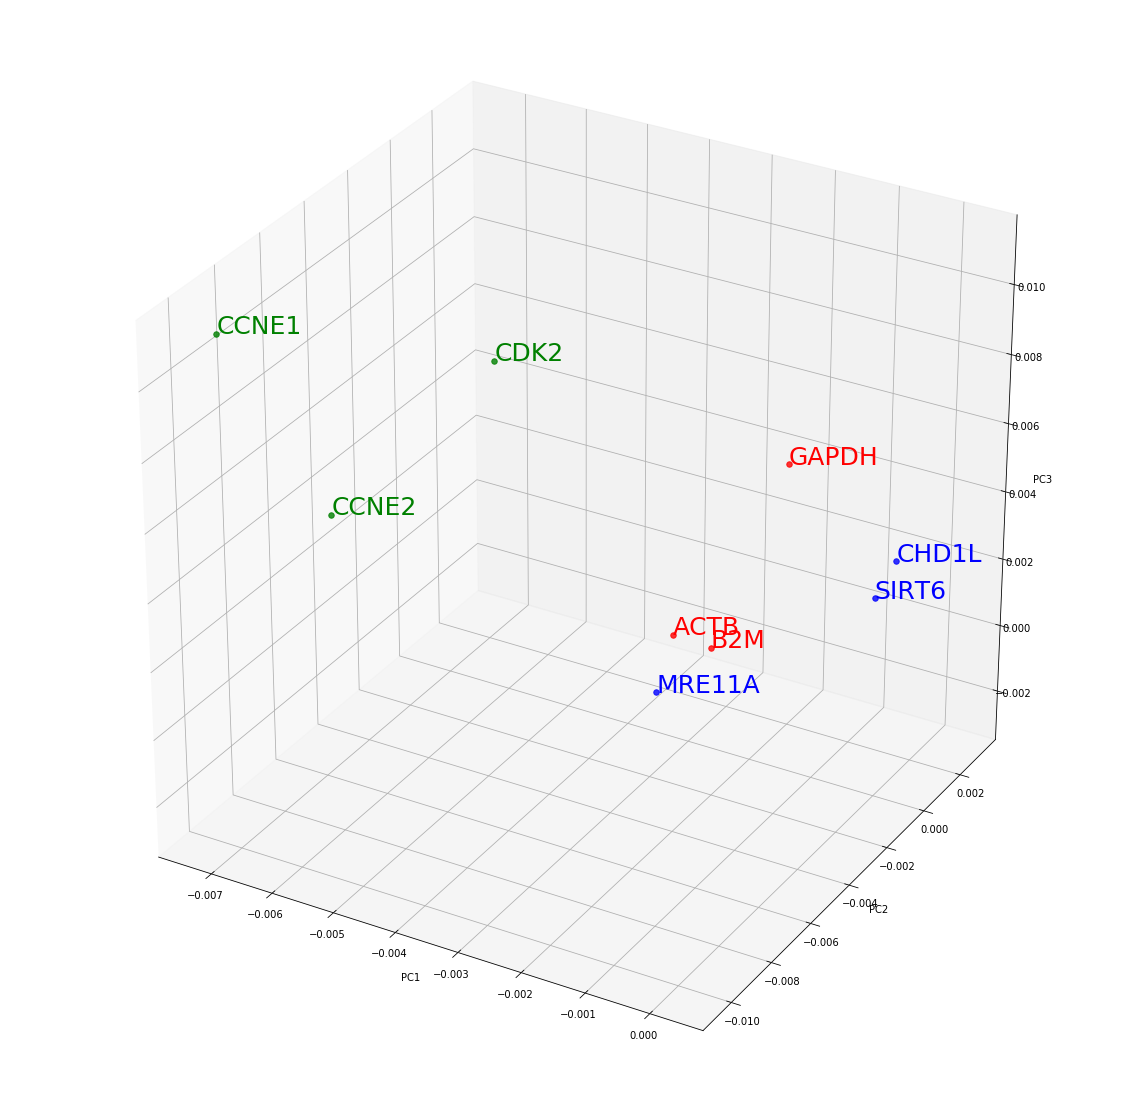

In [31]:
plot_gene_3dPCA(rawlog2_gene_pca, genes, hl_idxs=hl_idxs, showbg=False, hlfs=25)

##### gemb CN

In [32]:
gemb_pca = pca.fit(gemb_CN.T).components_; gemb_pca.shape

(3, 20531)

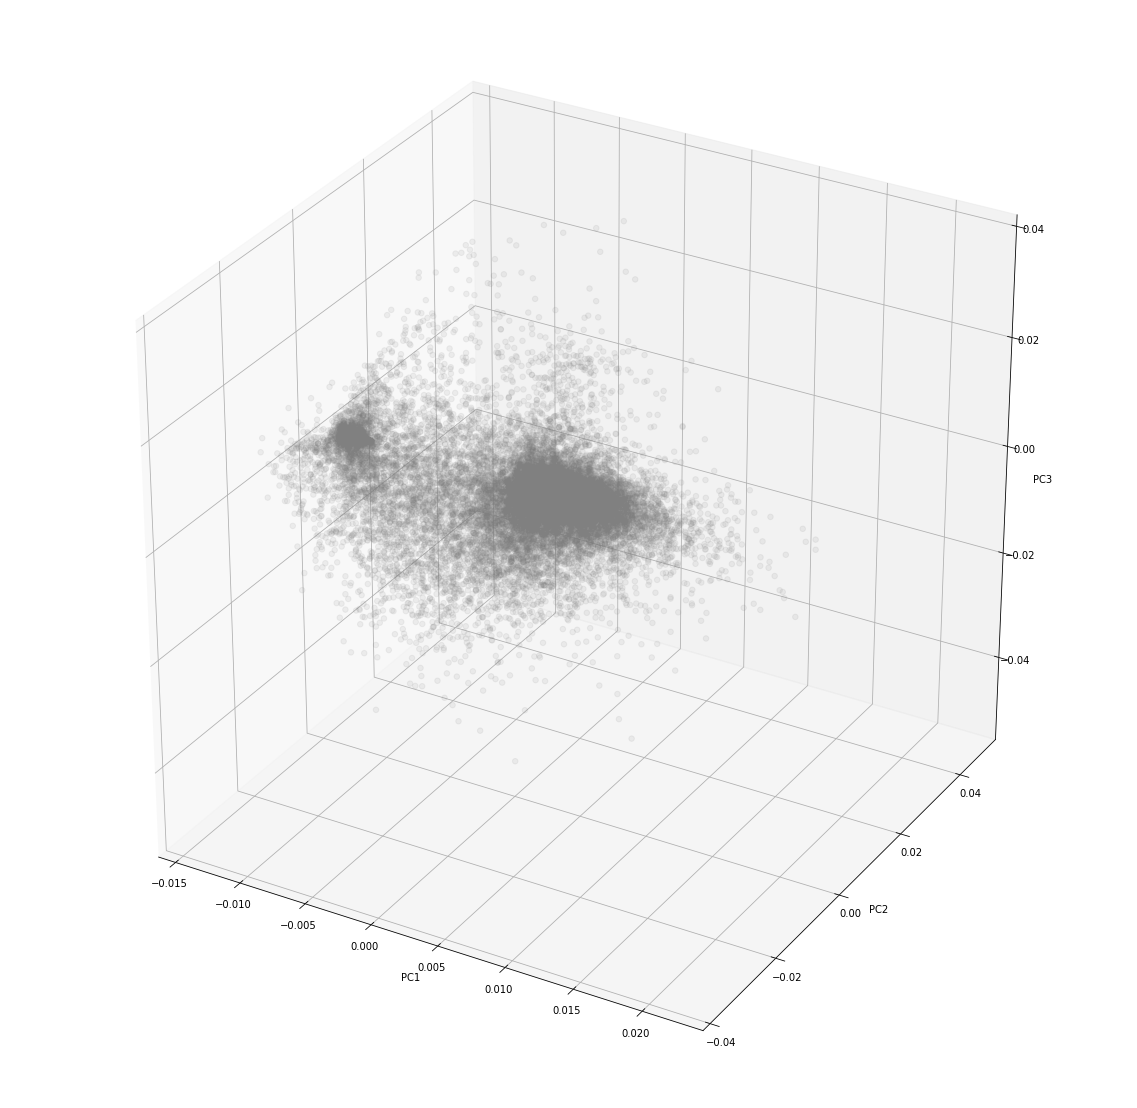

In [33]:
plot_gene_3dPCA(gemb_pca, genes)

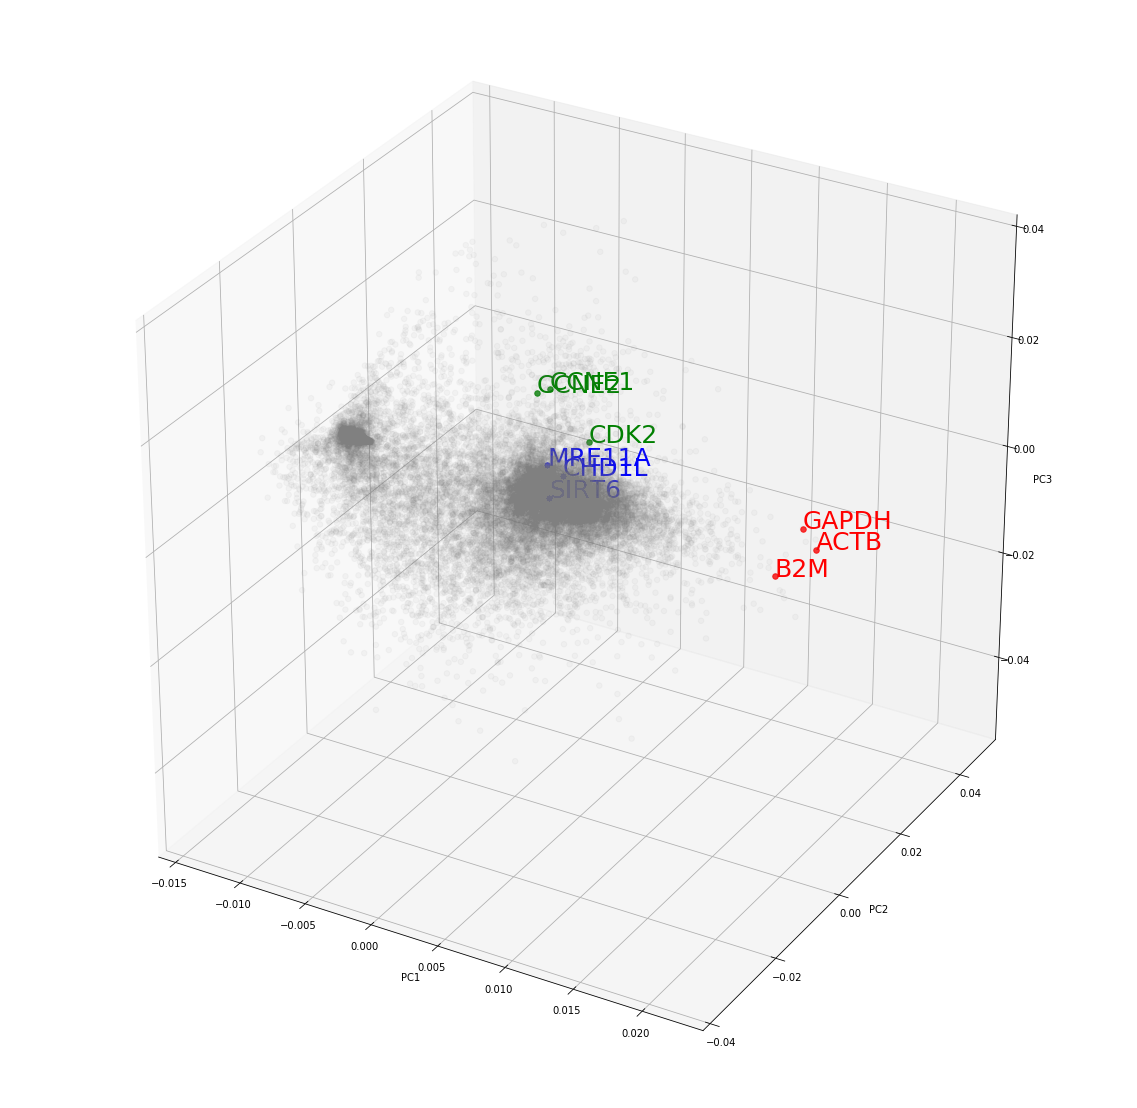

In [34]:
plot_gene_3dPCA(gemb_pca, genes, hl_idxs=hl_idxs, hlfs=25, bgalpha=0.05)

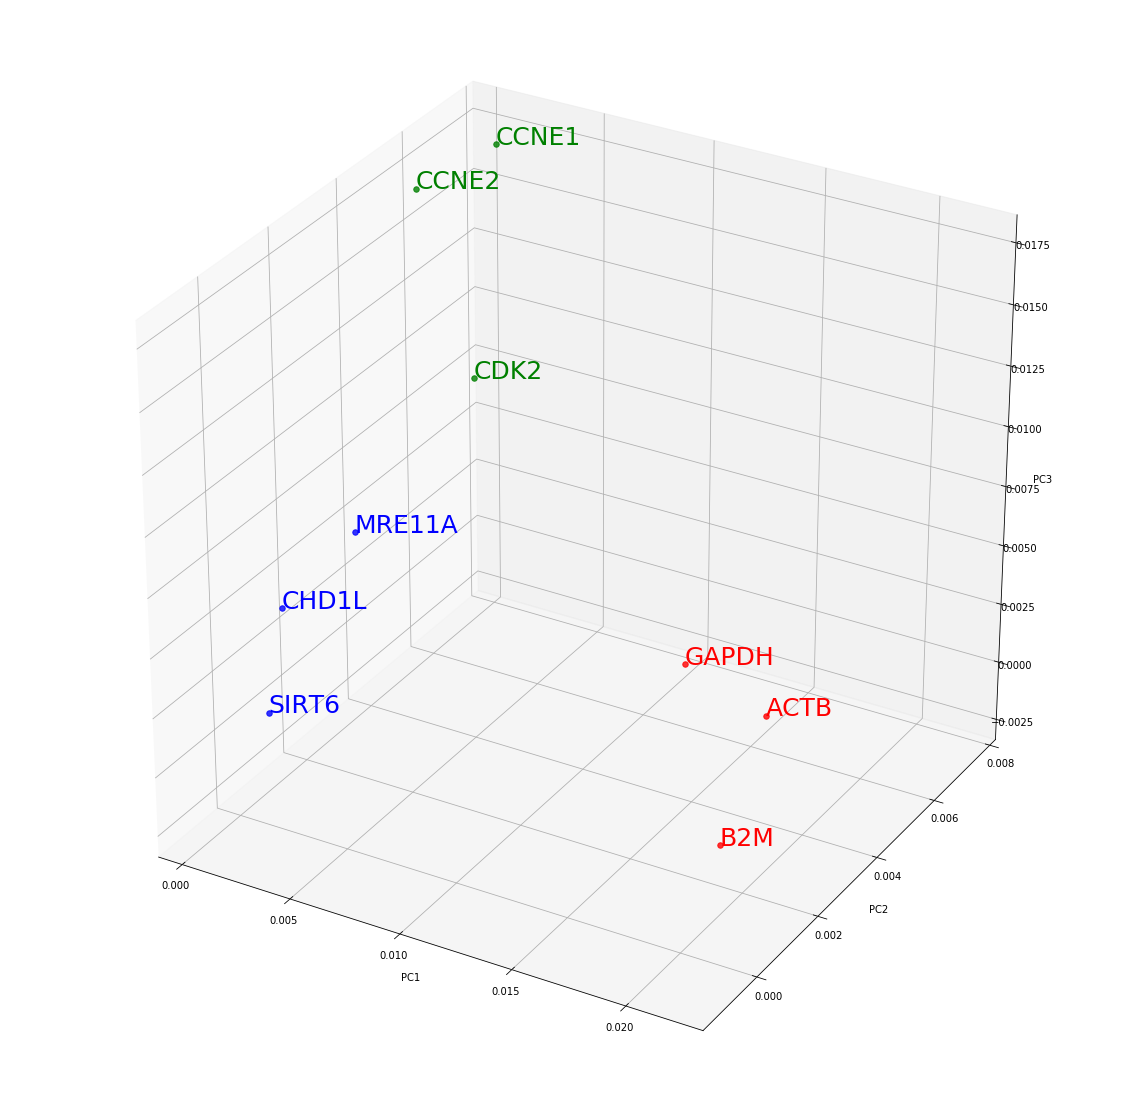

In [35]:
plot_gene_3dPCA(gemb_pca, genes, hl_idxs=hl_idxs, showbg=False, hlfs=25)

##### raw log2exp 50-component PCA

In [36]:
raw_gene_pca_pca = pca.fit(raw_gene_pca).components_; raw_gene_pca_pca.shape

(3, 20531)

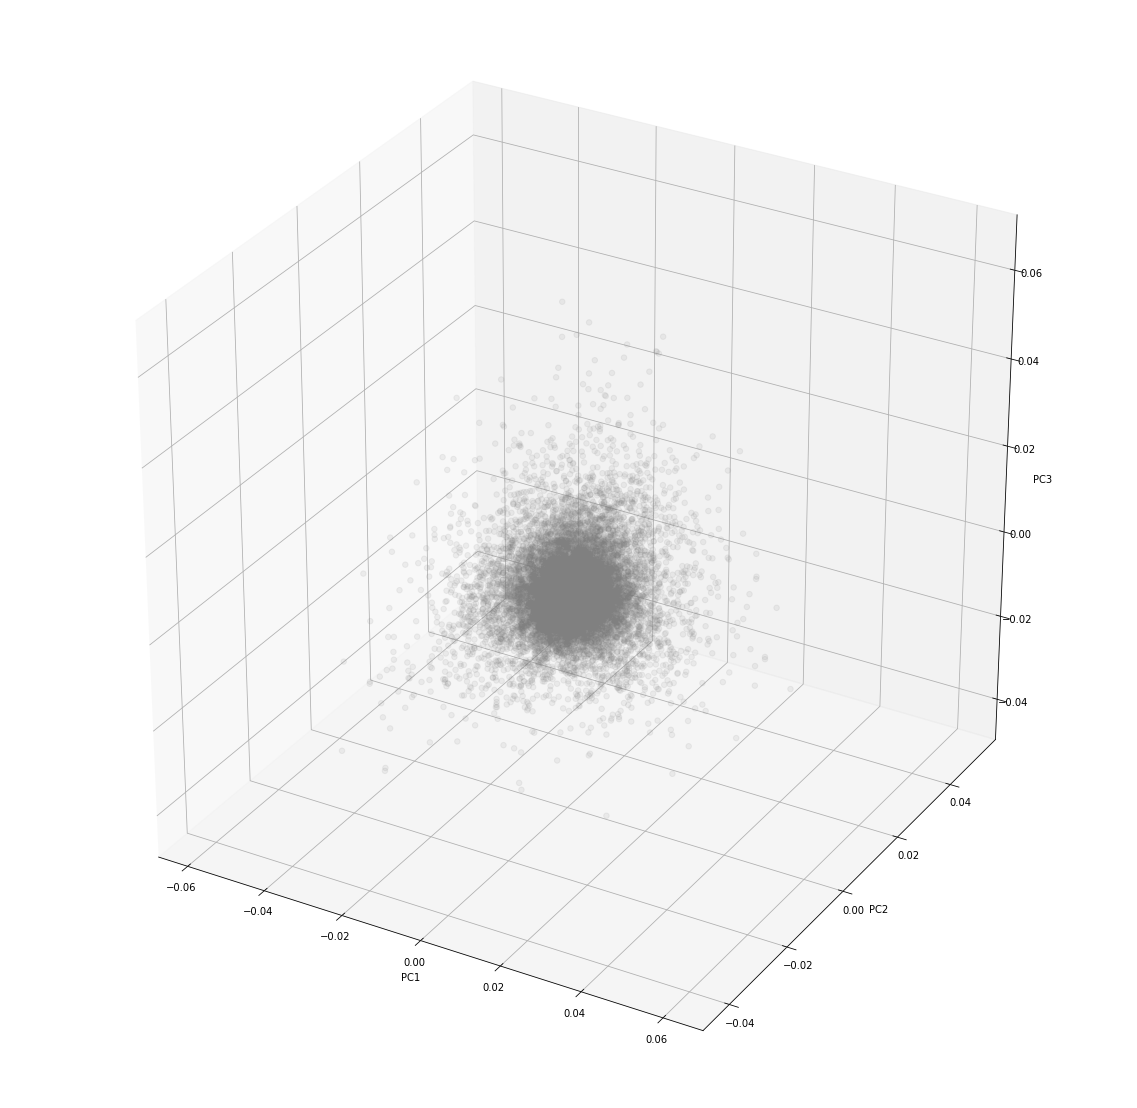

In [37]:
plot_gene_3dPCA(raw_gene_pca_pca, genes)

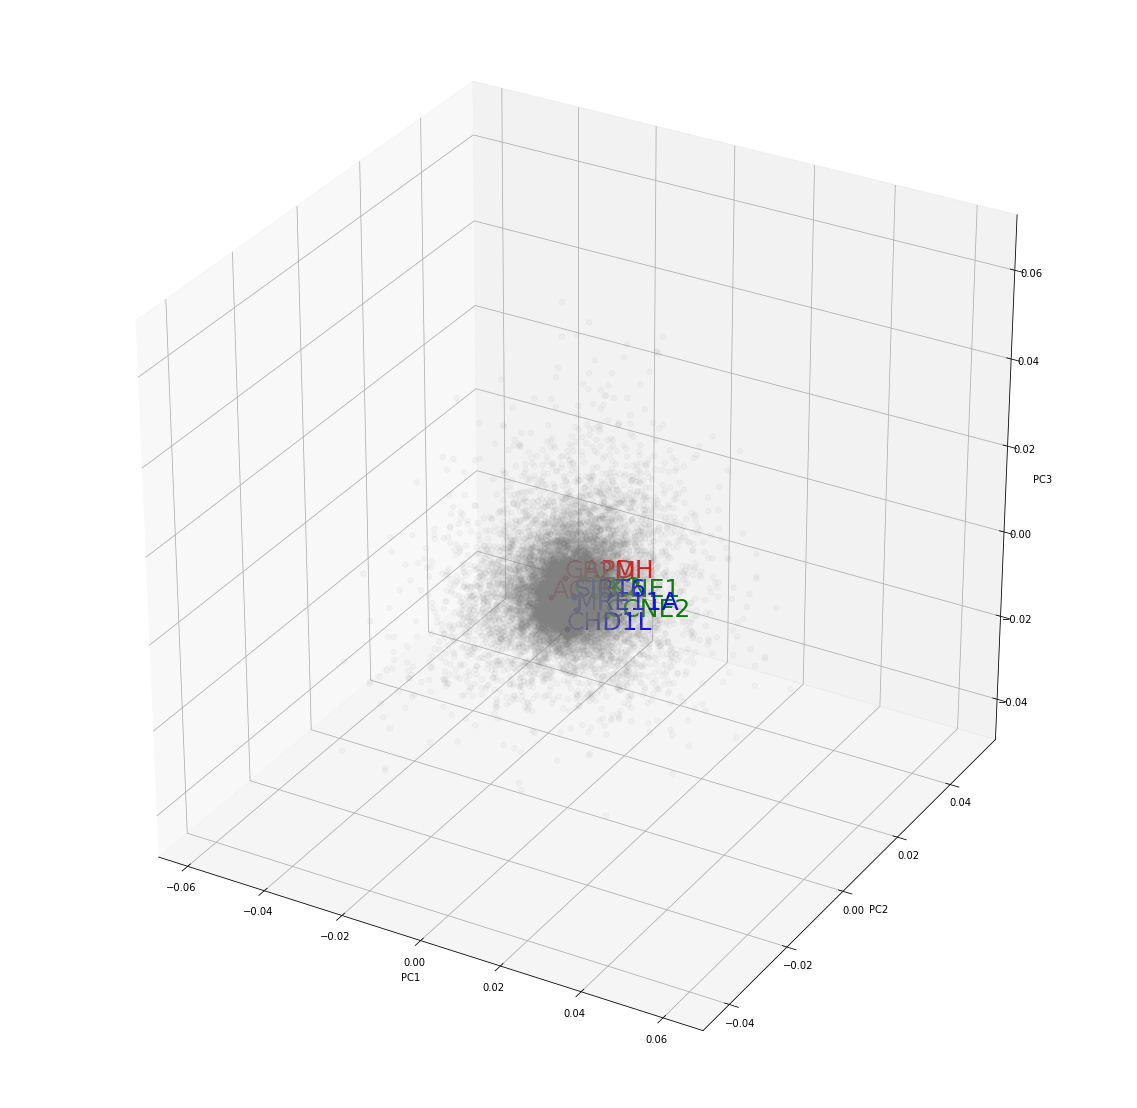

In [38]:
plot_gene_3dPCA(raw_gene_pca_pca, genes, hl_idxs=hl_idxs, bgalpha=0.05, hlfs=25)

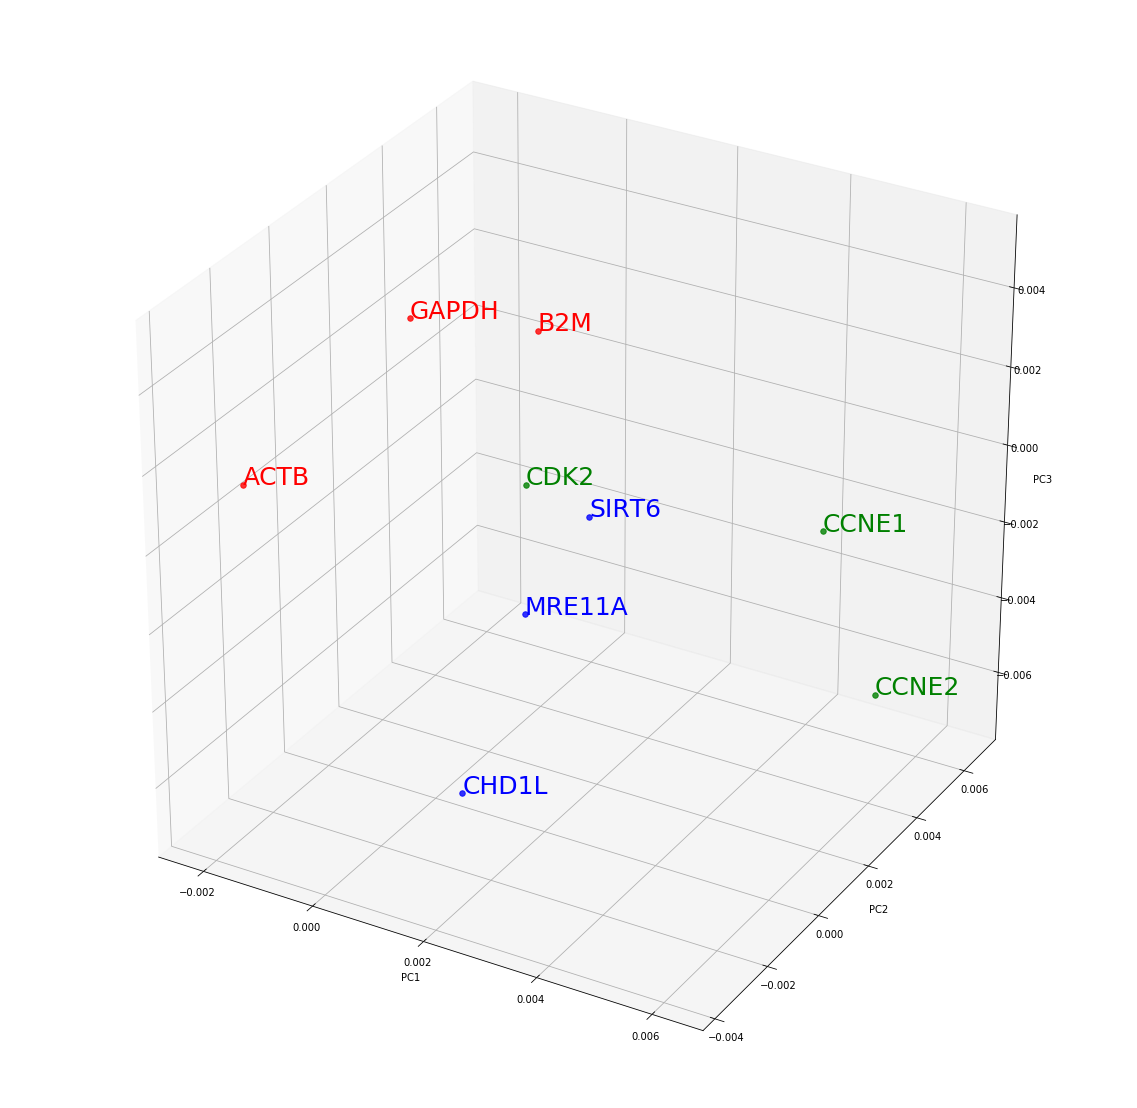

In [39]:
plot_gene_3dPCA(raw_gene_pca_pca, genes, hl_idxs=hl_idxs, showbg=False, hlfs=25)

##### som pca initialized gene codebook vector

In [40]:
som_pca_gwgt_pca = pca.fit(som_pca_gwgt.T).components_; som_pca_gwgt_pca.shape

(3, 20531)

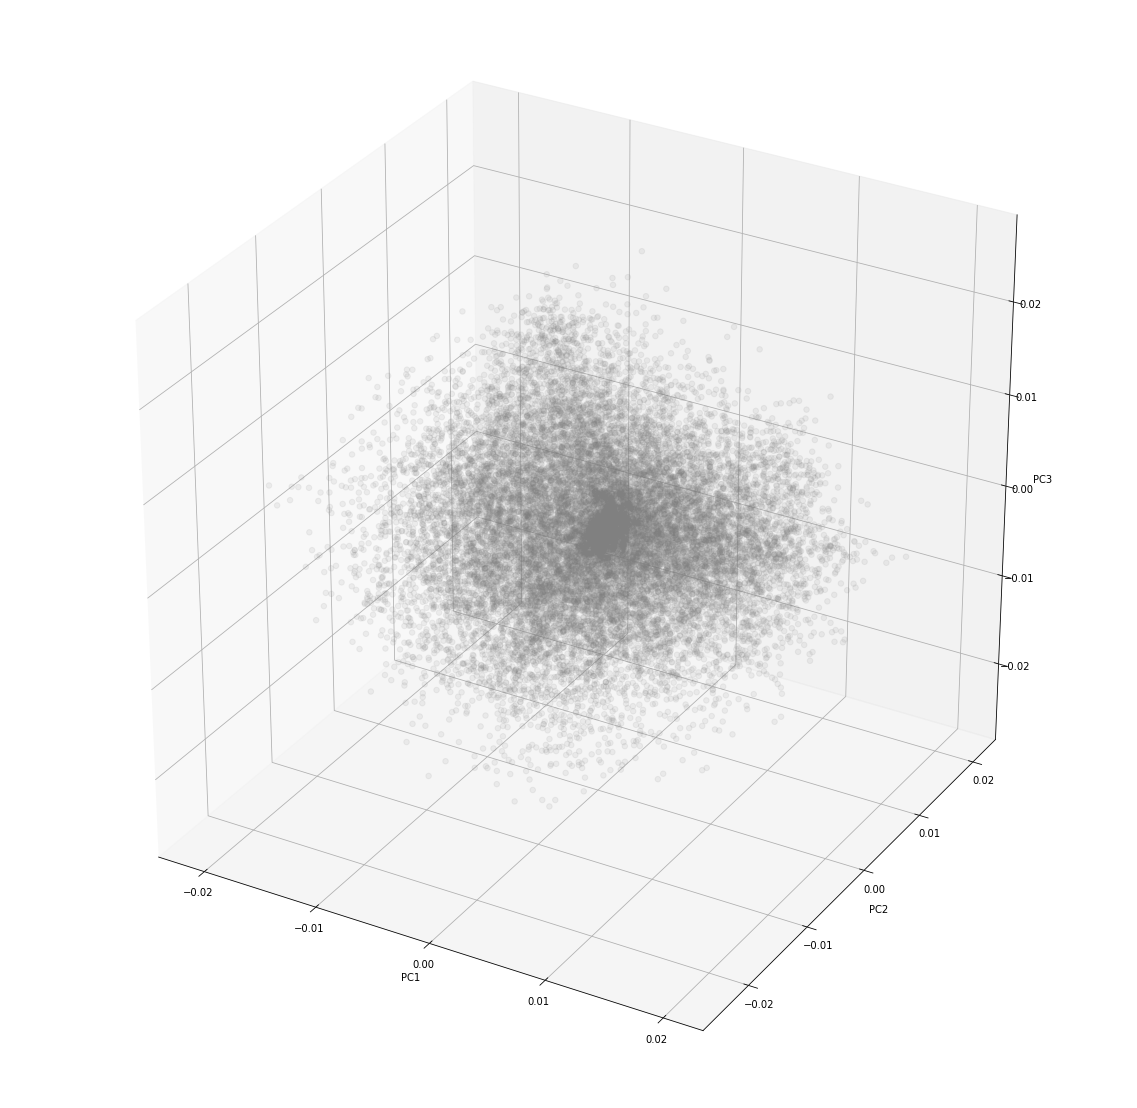

In [41]:
plot_gene_3dPCA(som_pca_gwgt_pca, genes)

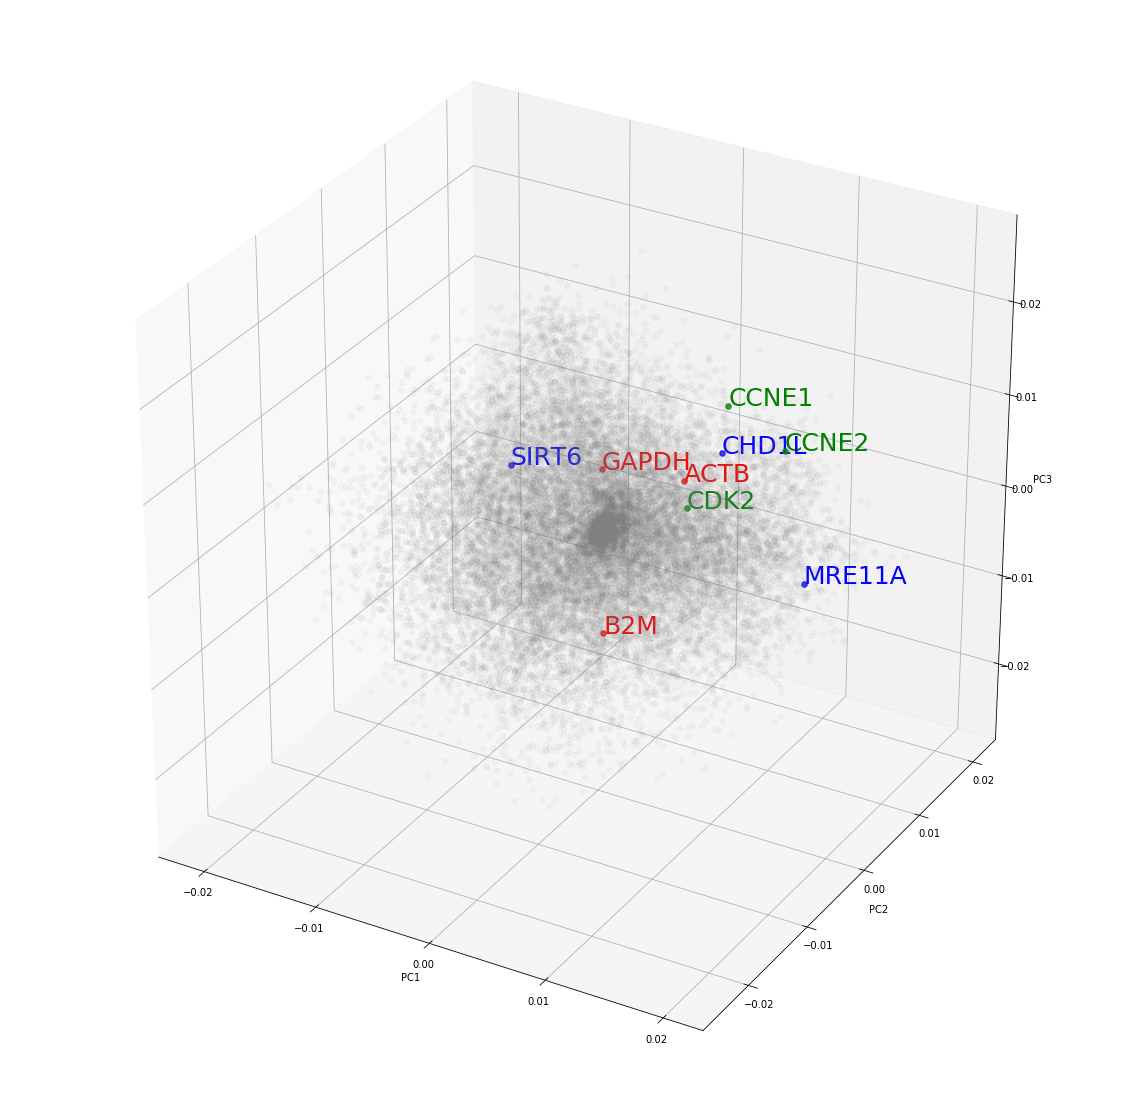

In [42]:
plot_gene_3dPCA(som_pca_gwgt_pca, genes, hl_idxs=hl_idxs, bgalpha=0.05, hlfs=25)

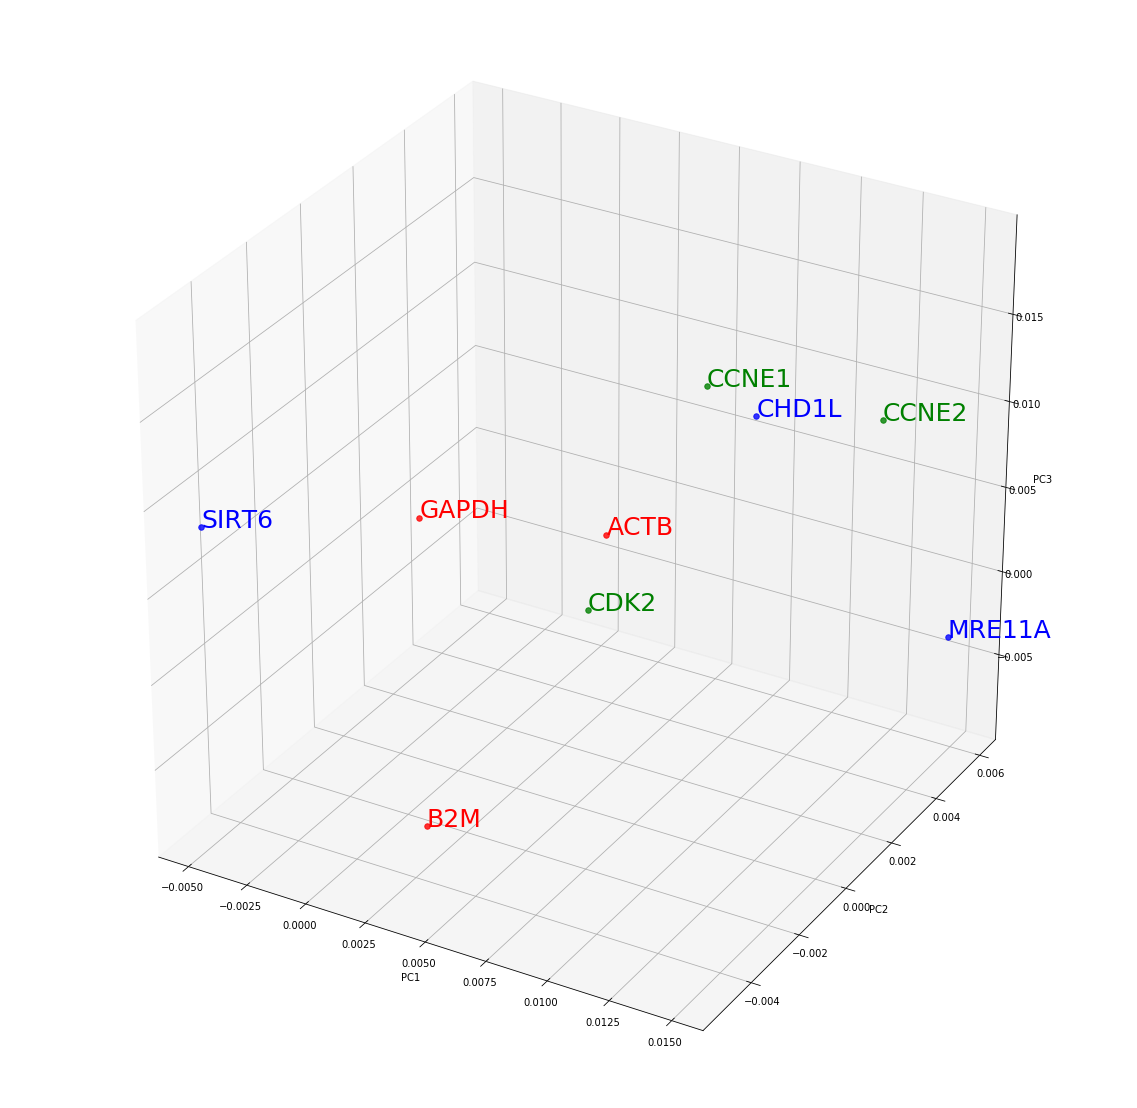

In [43]:
plot_gene_3dPCA(som_pca_gwgt_pca, genes, hl_idxs=hl_idxs, showbg=False, hlfs=25)

##### som random initialized gene codebook vector

In [44]:
som_rand_gwgt_pca = pca.fit(som_rand_gwgt.T).components_; som_rand_gwgt_pca.shape

(3, 20531)

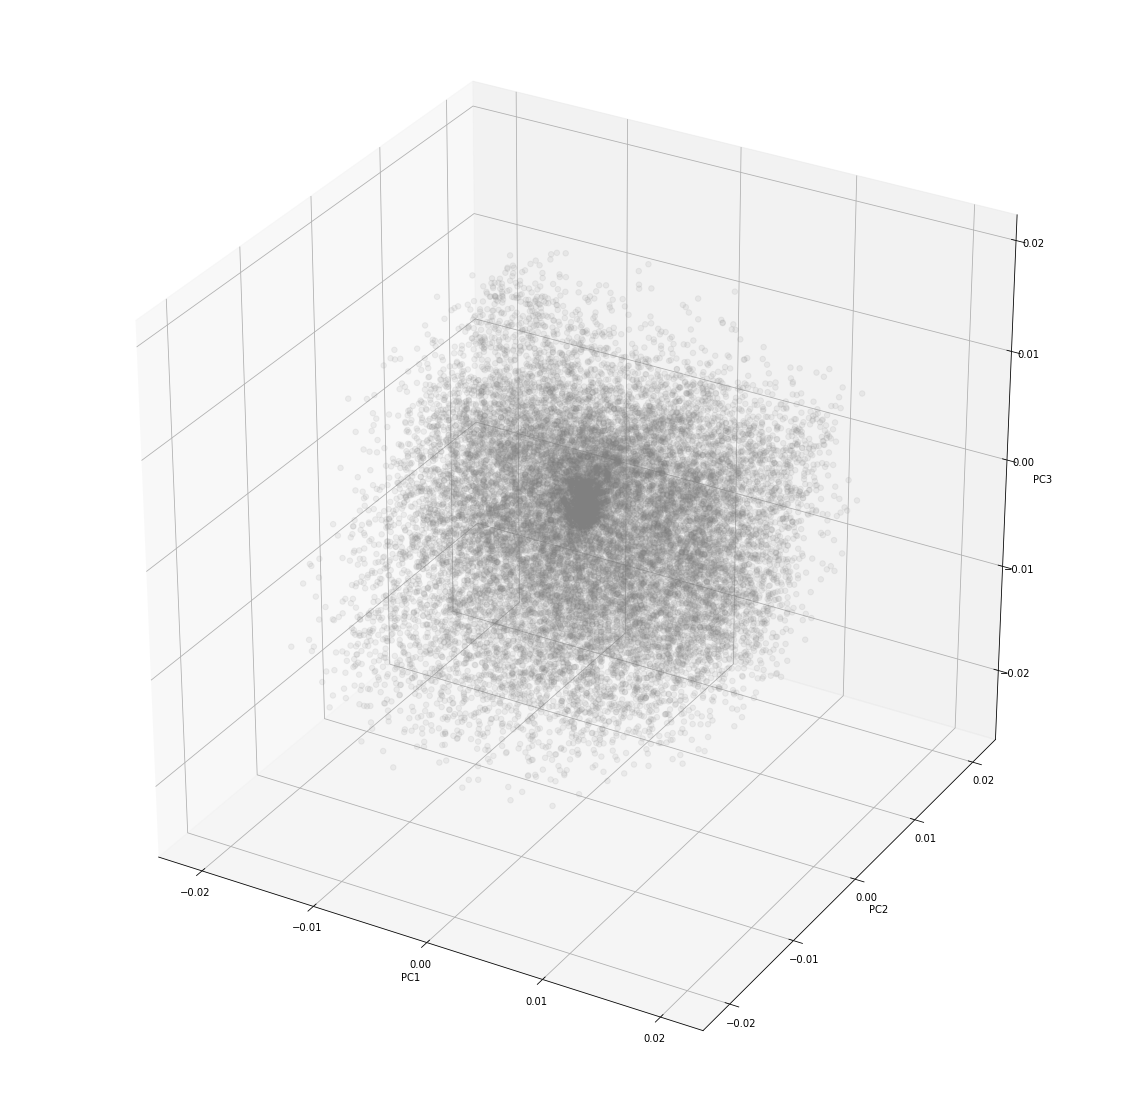

In [45]:
plot_gene_3dPCA(som_rand_gwgt_pca, genes)

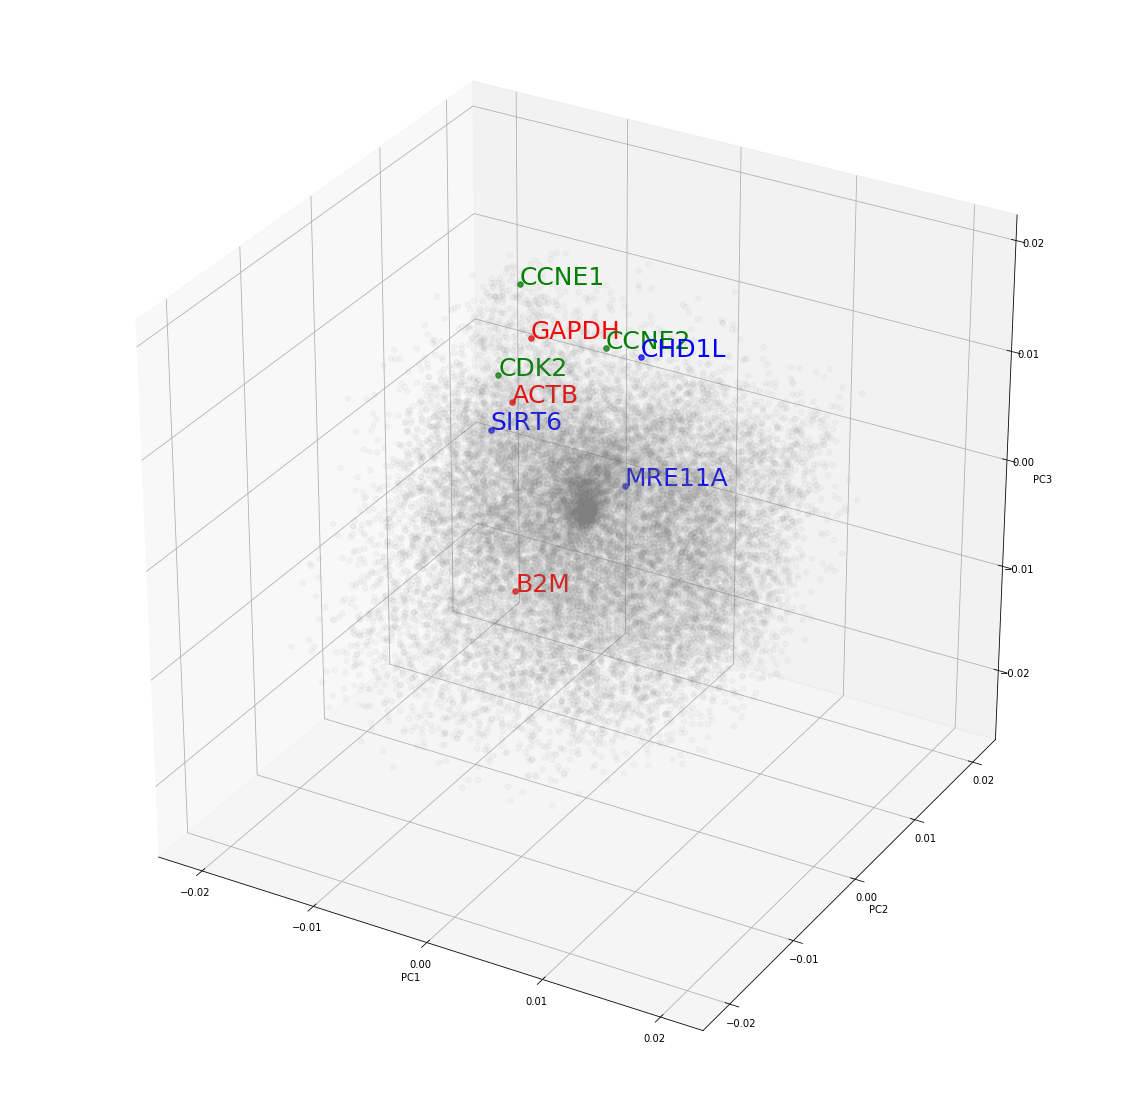

In [46]:
plot_gene_3dPCA(som_rand_gwgt_pca, genes, hl_idxs=hl_idxs, bgalpha=0.05, hlfs=25)

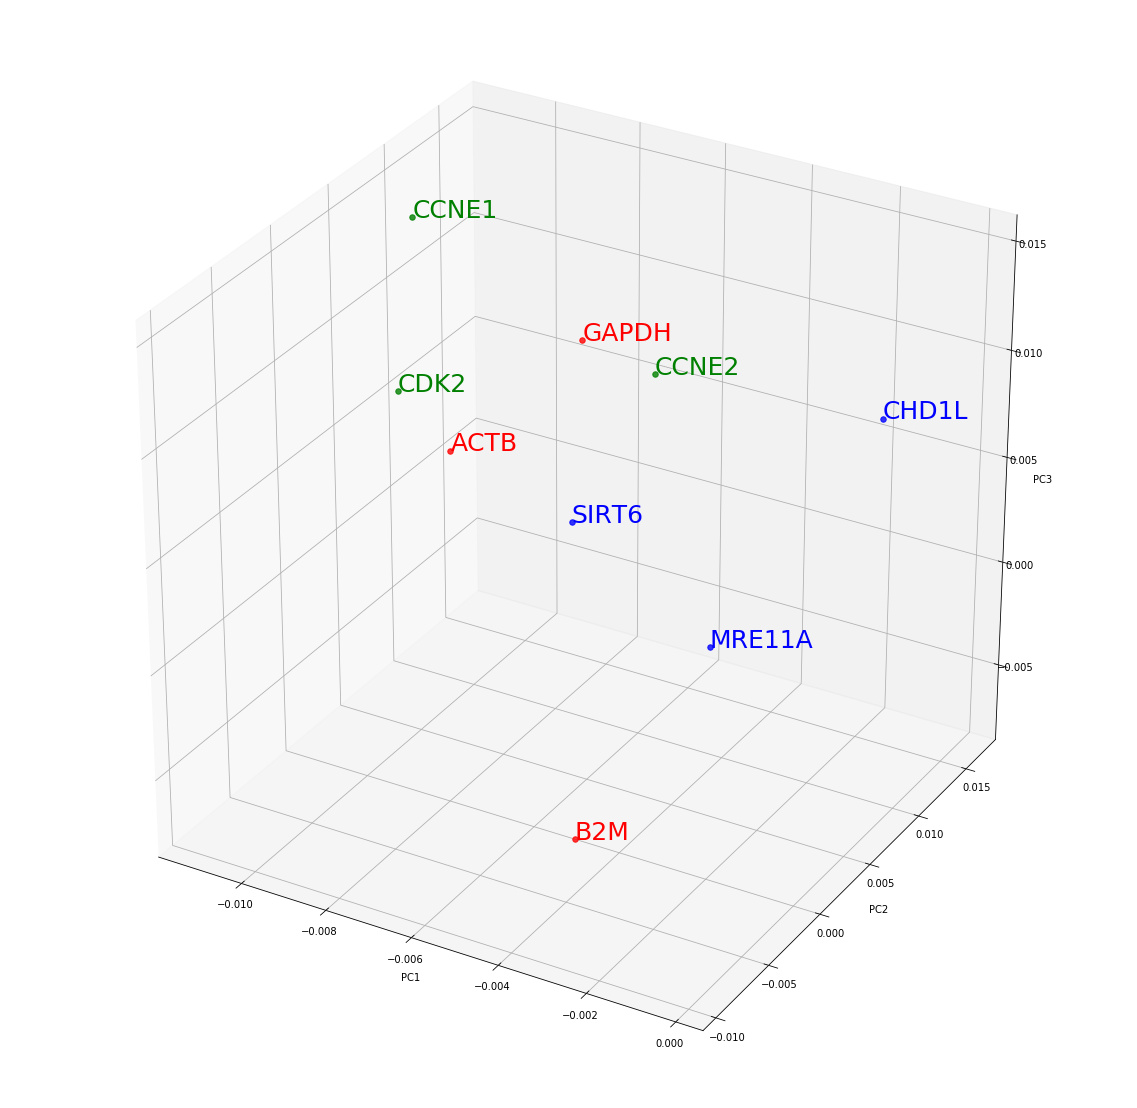

In [47]:
plot_gene_3dPCA(som_rand_gwgt_pca, genes, hl_idxs=hl_idxs, showbg=False, hlfs=25)

## tSNE

In [45]:
tsne = TSNE(n_components=3, verbose=1, perplexity=5, n_iter=50000)

In [46]:
semb_tsne = tsne.fit_transform(semb_CN)

In [68]:
plot_samp_3dPCA(semb_tsne.T, ca, ca2col)

## emb properties demo

In [48]:
gemb_CN_dist,_,_ = get_emb_dist(gemb_CN, return_pd=False)

shape: (20531, 20531); mean: 0.943; std: 0.317


In [49]:
raw_gene_pca_dist,_,_ = get_emb_dist(raw_gene_pca.T, return_pd=False)

shape: (20531, 20531); mean: 0.063; std: 0.030


In [50]:
som_pca_gwgt_dist,_,_ = get_emb_dist(som_pca_gwgt, return_pd=False)

shape: (20531, 20531); mean: 4.930; std: 1.302


In [51]:
som_rand_gwgt_dist,_,_ = get_emb_dist(som_rand_gwgt, return_pd=False)

shape: (20531, 20531); mean: 4.841; std: 1.273


In [52]:
print_gdist('PIK3CA', 'AKT1', gemb_CN_dist, gene2idx)
print_gdist('PIK3CA', 'AKT2', gemb_CN_dist, gene2idx)
print_gdist('PIK3CA', 'AKT3', gemb_CN_dist, gene2idx)
print_gdist('AKT1', 'MTOR', gemb_CN_dist, gene2idx)
print_gdist('AKT2', 'MTOR', gemb_CN_dist, gene2idx)
print_gdist('AKT3', 'MTOR', gemb_CN_dist, gene2idx)
print_gdist('MTOR', 'RPS6KB1', gemb_CN_dist, gene2idx)
print_gdist('MTOR', 'MAPKAP1', gemb_CN_dist, gene2idx)

0.7466625853108455
0.6288427969922927
0.790980927914105
0.46806087221884474
0.38594239622707943
0.7123283619183238
0.45036748865744536
0.4106369894393207


In [53]:
print_gdist('PIK3CA', 'AKT1', raw_gene_pca_dist, gene2idx)
print_gdist('PIK3CA', 'AKT2', raw_gene_pca_dist, gene2idx)
print_gdist('PIK3CA', 'AKT3', raw_gene_pca_dist, gene2idx)
print_gdist('AKT1', 'MTOR', raw_gene_pca_dist, gene2idx)
print_gdist('AKT2', 'MTOR', raw_gene_pca_dist, gene2idx)
print_gdist('AKT3', 'MTOR', raw_gene_pca_dist, gene2idx)
print_gdist('MTOR', 'RPS6KB1', raw_gene_pca_dist, gene2idx)
print_gdist('MTOR', 'MAPKAP1', raw_gene_pca_dist, gene2idx)

0.03619152452914478
0.03304888590476083
0.04416586247191636
0.027764239652570608
0.024635433244238045
0.046810937902043874
0.0305647143995706
0.02540271139189991


In [54]:
print_gdist('PIK3CA', 'AKT1', som_pca_gwgt_dist, gene2idx)
print_gdist('PIK3CA', 'AKT2', som_pca_gwgt_dist, gene2idx)
print_gdist('PIK3CA', 'AKT3', som_pca_gwgt_dist, gene2idx)
print_gdist('AKT1', 'MTOR', som_pca_gwgt_dist, gene2idx)
print_gdist('AKT2', 'MTOR', som_pca_gwgt_dist, gene2idx)
print_gdist('AKT3', 'MTOR', som_pca_gwgt_dist, gene2idx)
print_gdist('MTOR', 'RPS6KB1', som_pca_gwgt_dist, gene2idx)
print_gdist('MTOR', 'MAPKAP1', som_pca_gwgt_dist, gene2idx)

5.384229418568084
5.798141367258562
5.9000062342661135
4.349644749771181
5.069743088315521
5.725289112046919
3.5104206778685367
3.661680295346387


In [55]:
print_gdist('PIK3CA', 'AKT1', som_rand_gwgt_dist, gene2idx)
print_gdist('PIK3CA', 'AKT2', som_rand_gwgt_dist, gene2idx)
print_gdist('PIK3CA', 'AKT3', som_rand_gwgt_dist, gene2idx)
print_gdist('AKT1', 'MTOR', som_rand_gwgt_dist, gene2idx)
print_gdist('AKT2', 'MTOR', som_rand_gwgt_dist, gene2idx)
print_gdist('AKT3', 'MTOR', som_rand_gwgt_dist, gene2idx)
print_gdist('MTOR', 'RPS6KB1', som_rand_gwgt_dist, gene2idx)
print_gdist('MTOR', 'MAPKAP1', som_rand_gwgt_dist, gene2idx)

4.993877520710836
5.818161005194338
5.742402432335964
3.848798547274461
5.006416733341622
5.305159392703579
3.156705142673766
3.198208582470818


In [56]:
lv1_genes = ['PIK3CA']
lv2_genes = ['AKT1', 'AKT2', 'AKT3']
lv3_genes = ['MTOR']
lv4_genes = ['RPS6KB1', 'MAPKAP1']
lv1_idxs = [gene2idx[g] for g in lv1_genes]
lv2_idxs = [gene2idx[g] for g in lv2_genes]
lv3_idxs = [gene2idx[g] for g in lv3_genes]
lv4_idxs = [gene2idx[g] for g in lv4_genes]
hl_idxs = [lv1_idxs, lv2_idxs, lv3_idxs, lv4_idxs]

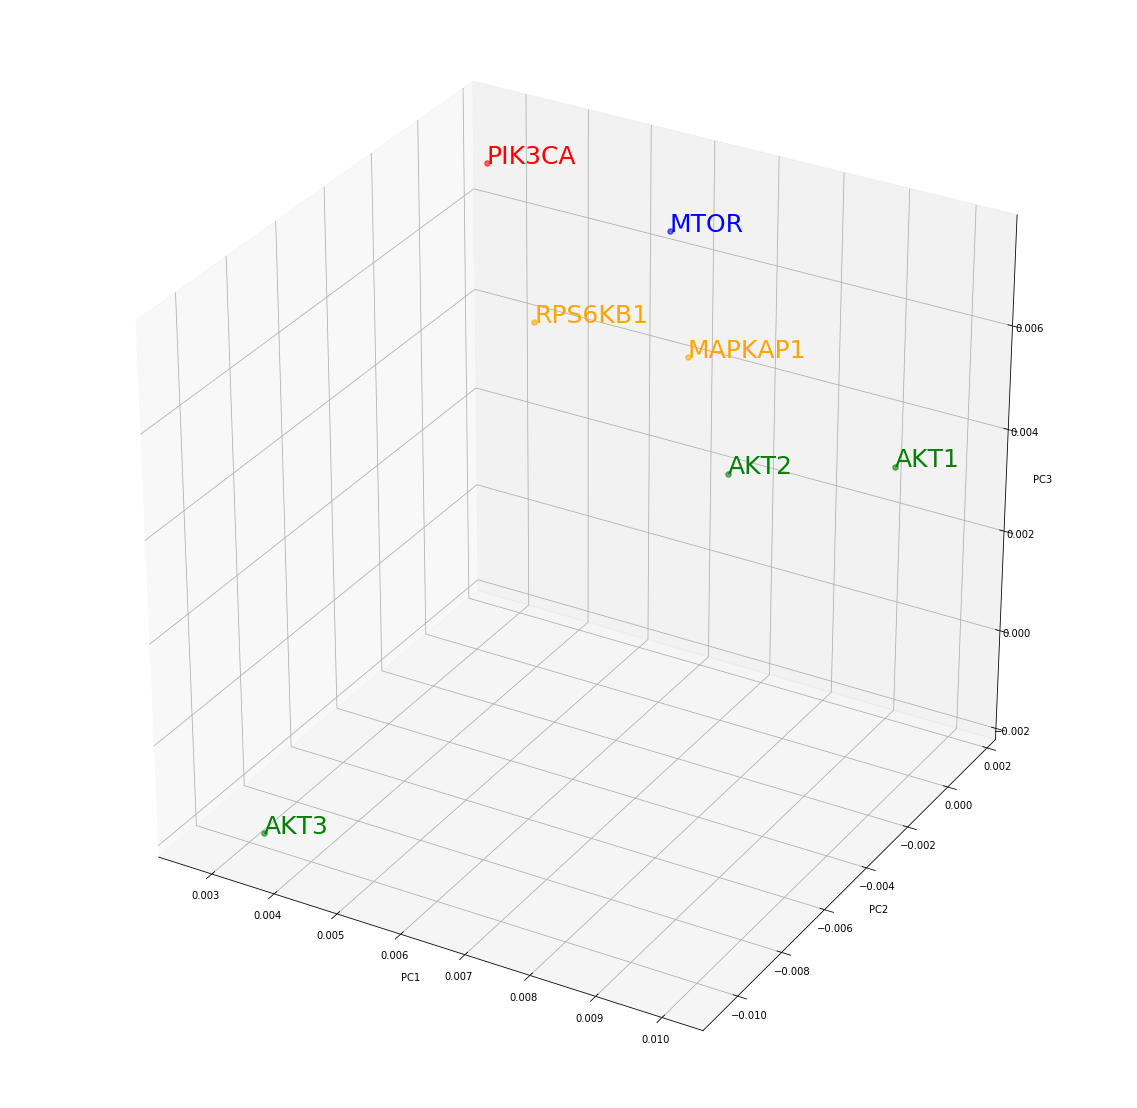

In [57]:
plot_gene_3dPCA(gemb_pca, genes, hl_idxs=hl_idxs, 
                hl_cols=['r', 'g', 'b', 'orange', 'teal'], showbg=False,
                hlfs=25, hlalpha=0.6)

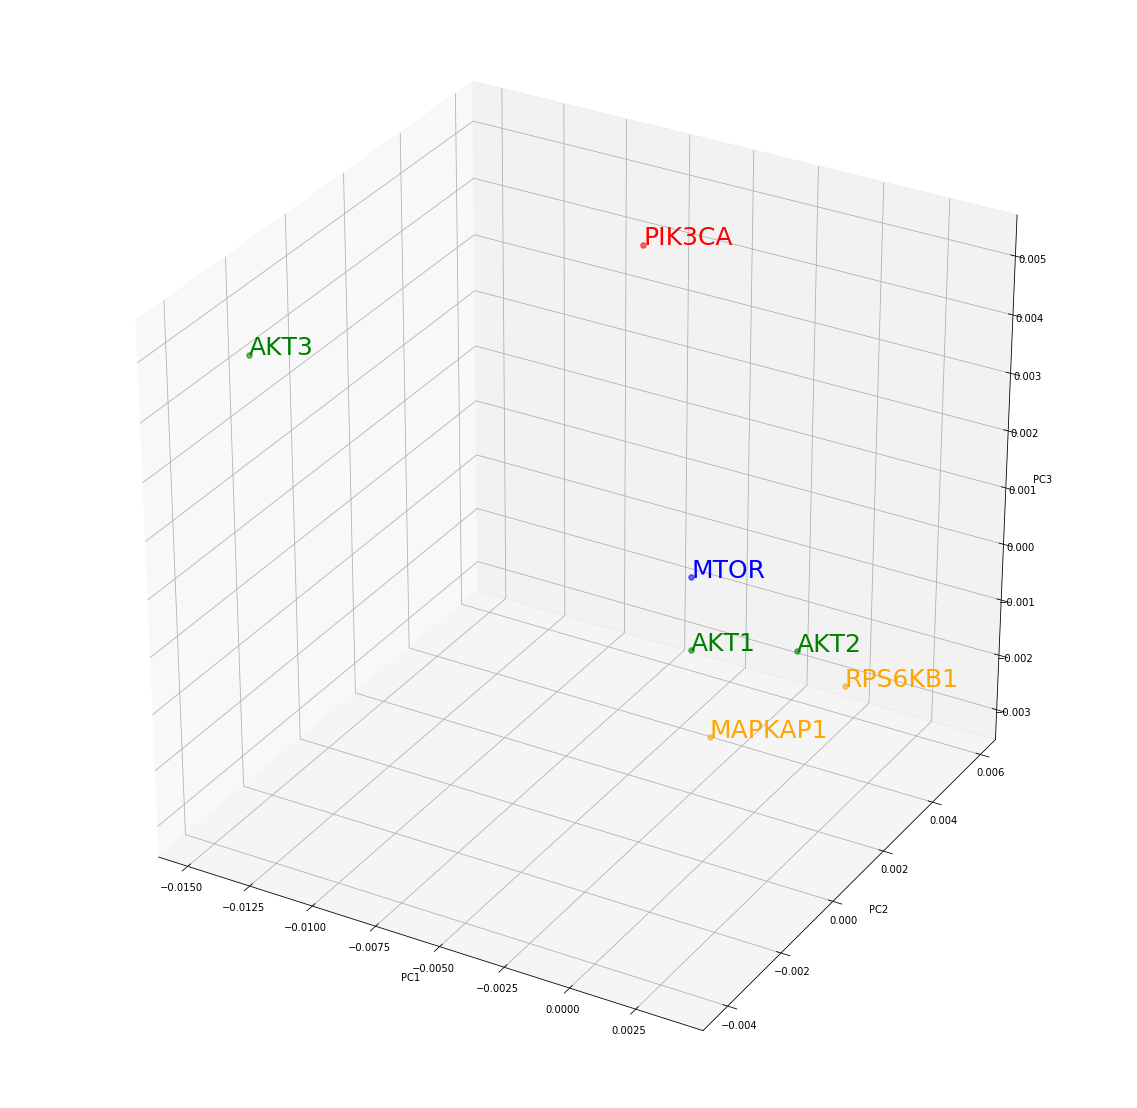

In [58]:
plot_gene_3dPCA(raw_gene_pca_pca, genes, hl_idxs=hl_idxs, 
                hl_cols=['r', 'g', 'b', 'orange', 'teal'], showbg=False,
                hlfs=25, hlalpha=0.6)

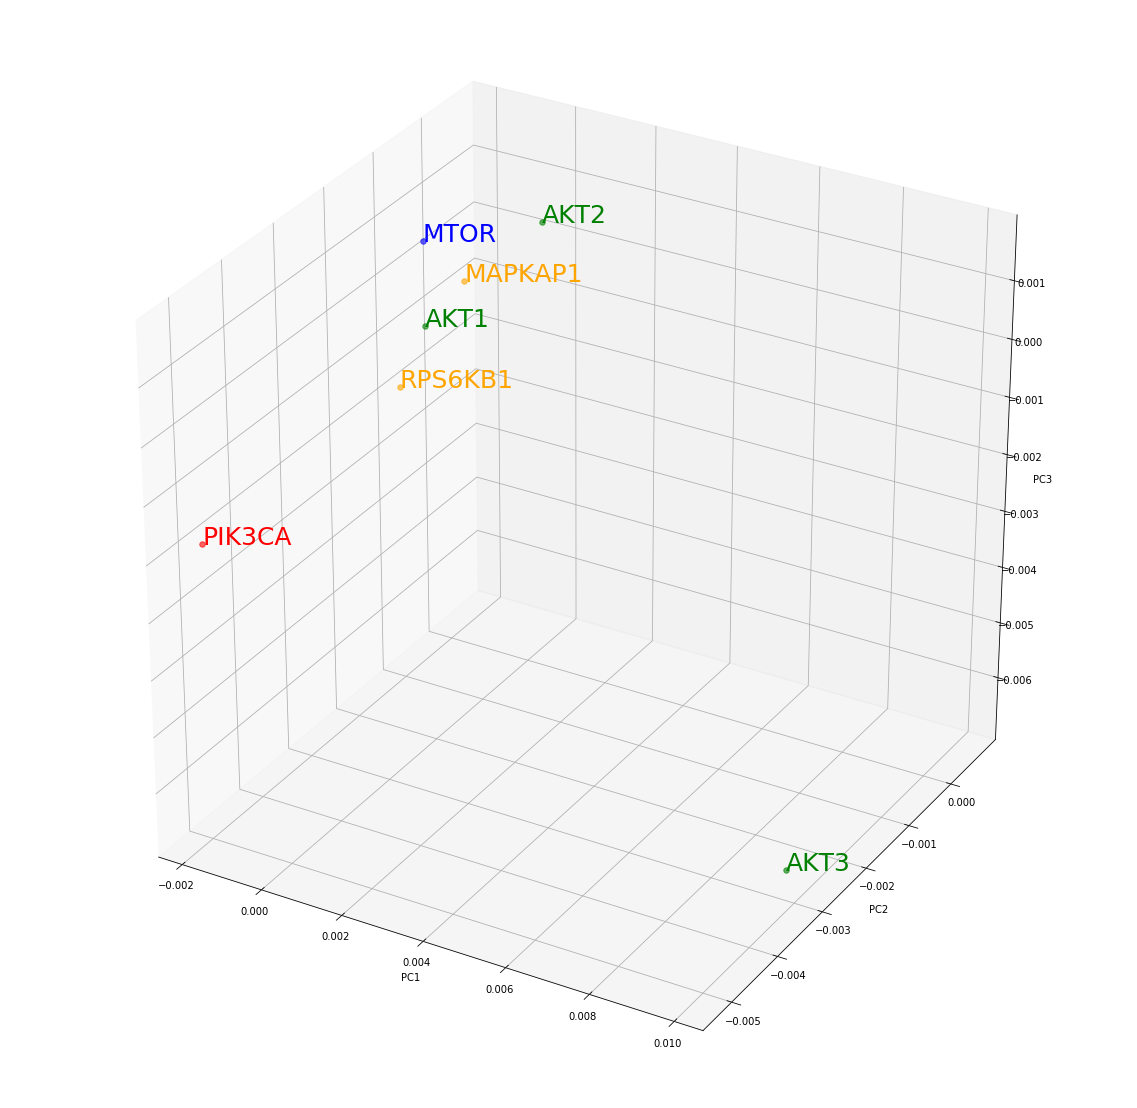

In [59]:
plot_gene_3dPCA(raw_gene_pca, genes, hl_idxs=hl_idxs, 
                hl_cols=['r', 'g', 'b', 'orange', 'teal'], showbg=False,
                hlfs=25, hlalpha=0.6)

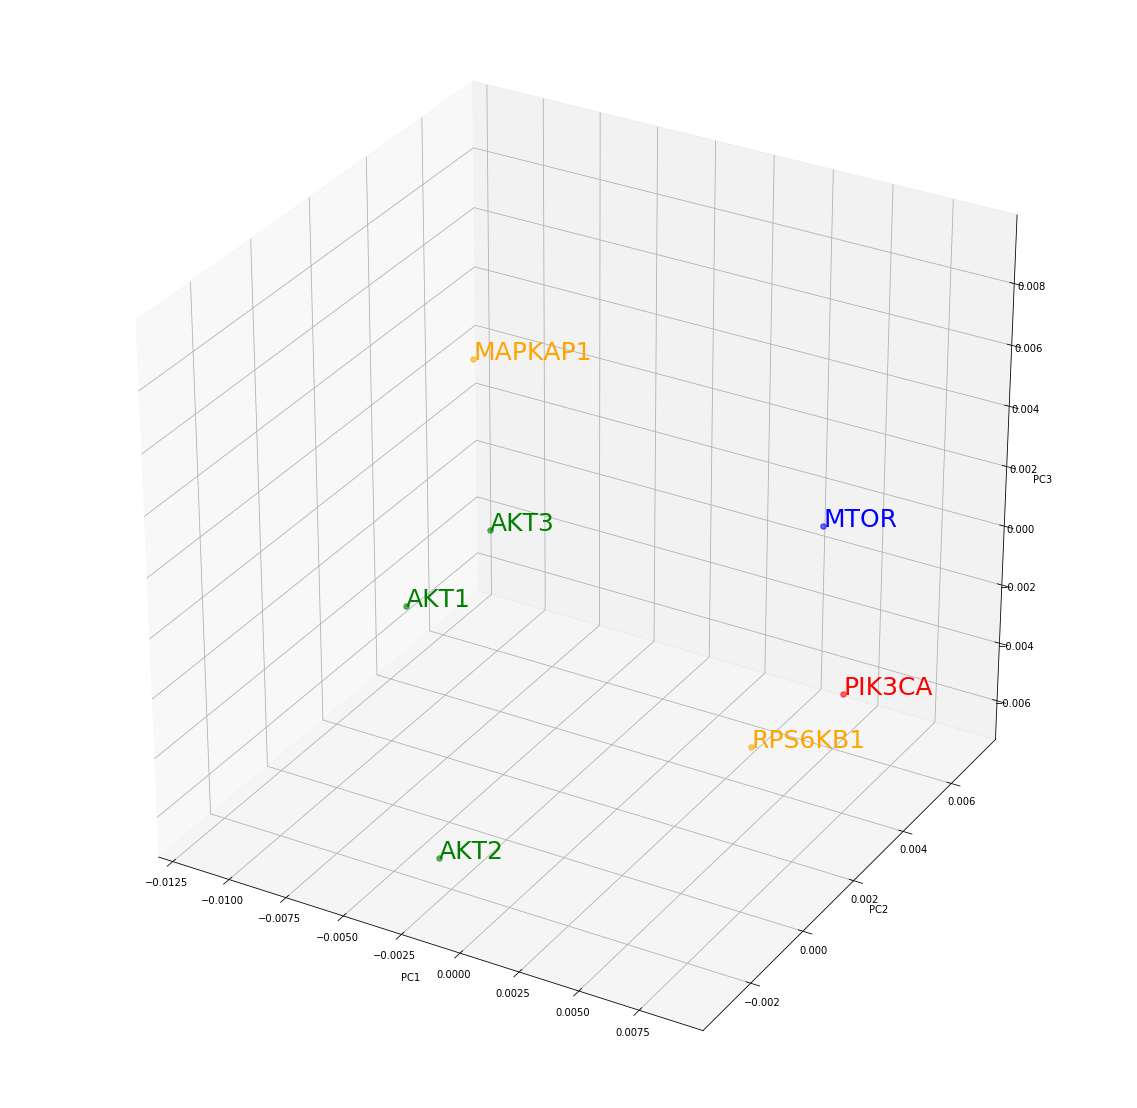

In [60]:
plot_gene_3dPCA(som_pca_gwgt_pca, genes, hl_idxs=hl_idxs, 
                hl_cols=['r', 'g', 'b', 'orange', 'teal'], showbg=False,
                hlfs=25, hlalpha=0.6)

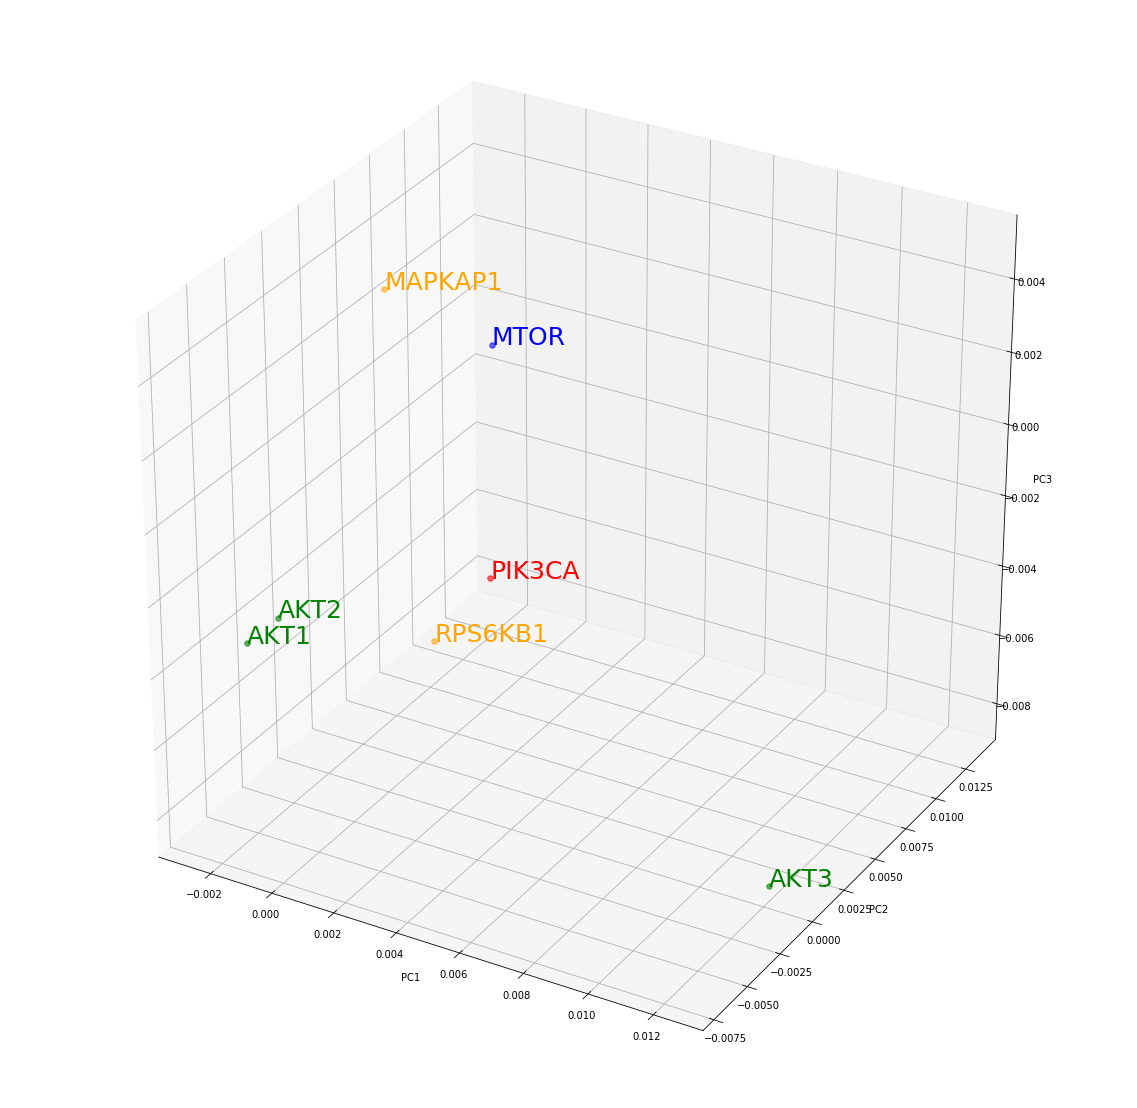

In [61]:
plot_gene_3dPCA(som_rand_gwgt_pca, genes, hl_idxs=hl_idxs, 
                hl_cols=['r', 'g', 'b', 'orange', 'teal'], showbg=False,
                hlfs=25, hlalpha=0.6)